# WOHOO Results

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

# Set seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Random Forests

In [2]:
# File mapping for clarity
files = {
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
    # "LR_balanced": "inference/LR_balanced.csv",
    # "LR_biased": "inference/LR_biased.csv",
    # "LR_SMOTE": "inference/LR_SMOTE.csv",
    "RF_balanced": "inference/RF_balanced.csv",
    "RF_biased": "inference/RF_biased.csv",
    "RF_SMOTE": "inference/RF_SMOTE.csv",
}

In [6]:
# Initialize a DataFrame to store metrics
metrics_list = []

# Helper function for FNR
def fnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn / (fn + tp) if (fn + tp) > 0 else np.nan

# Helper function for FNR
def fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn) if (fp + tn) > 0 else np.nan


# Load CSVs and compute metrics

for model_name, path in files.items():
    df = pd.read_csv(path)
    for race in df['race'].unique():
        sub = df[df['race'] == race]
        y_true = sub['True_Label']
        y_pred = sub['Predicted_Label']
        metrics_list.append({
            "Model": model_name,
            "Race": race,
            "F1": f1_score(y_true, y_pred),
            "Precision": precision_score(y_true, y_pred),
            "Recall": recall_score(y_true, y_pred),
            "FNR": fnr(y_true, y_pred),
            "FPR": fpr(y_true, y_pred)
        })

metrics_df = pd.DataFrame(metrics_list)

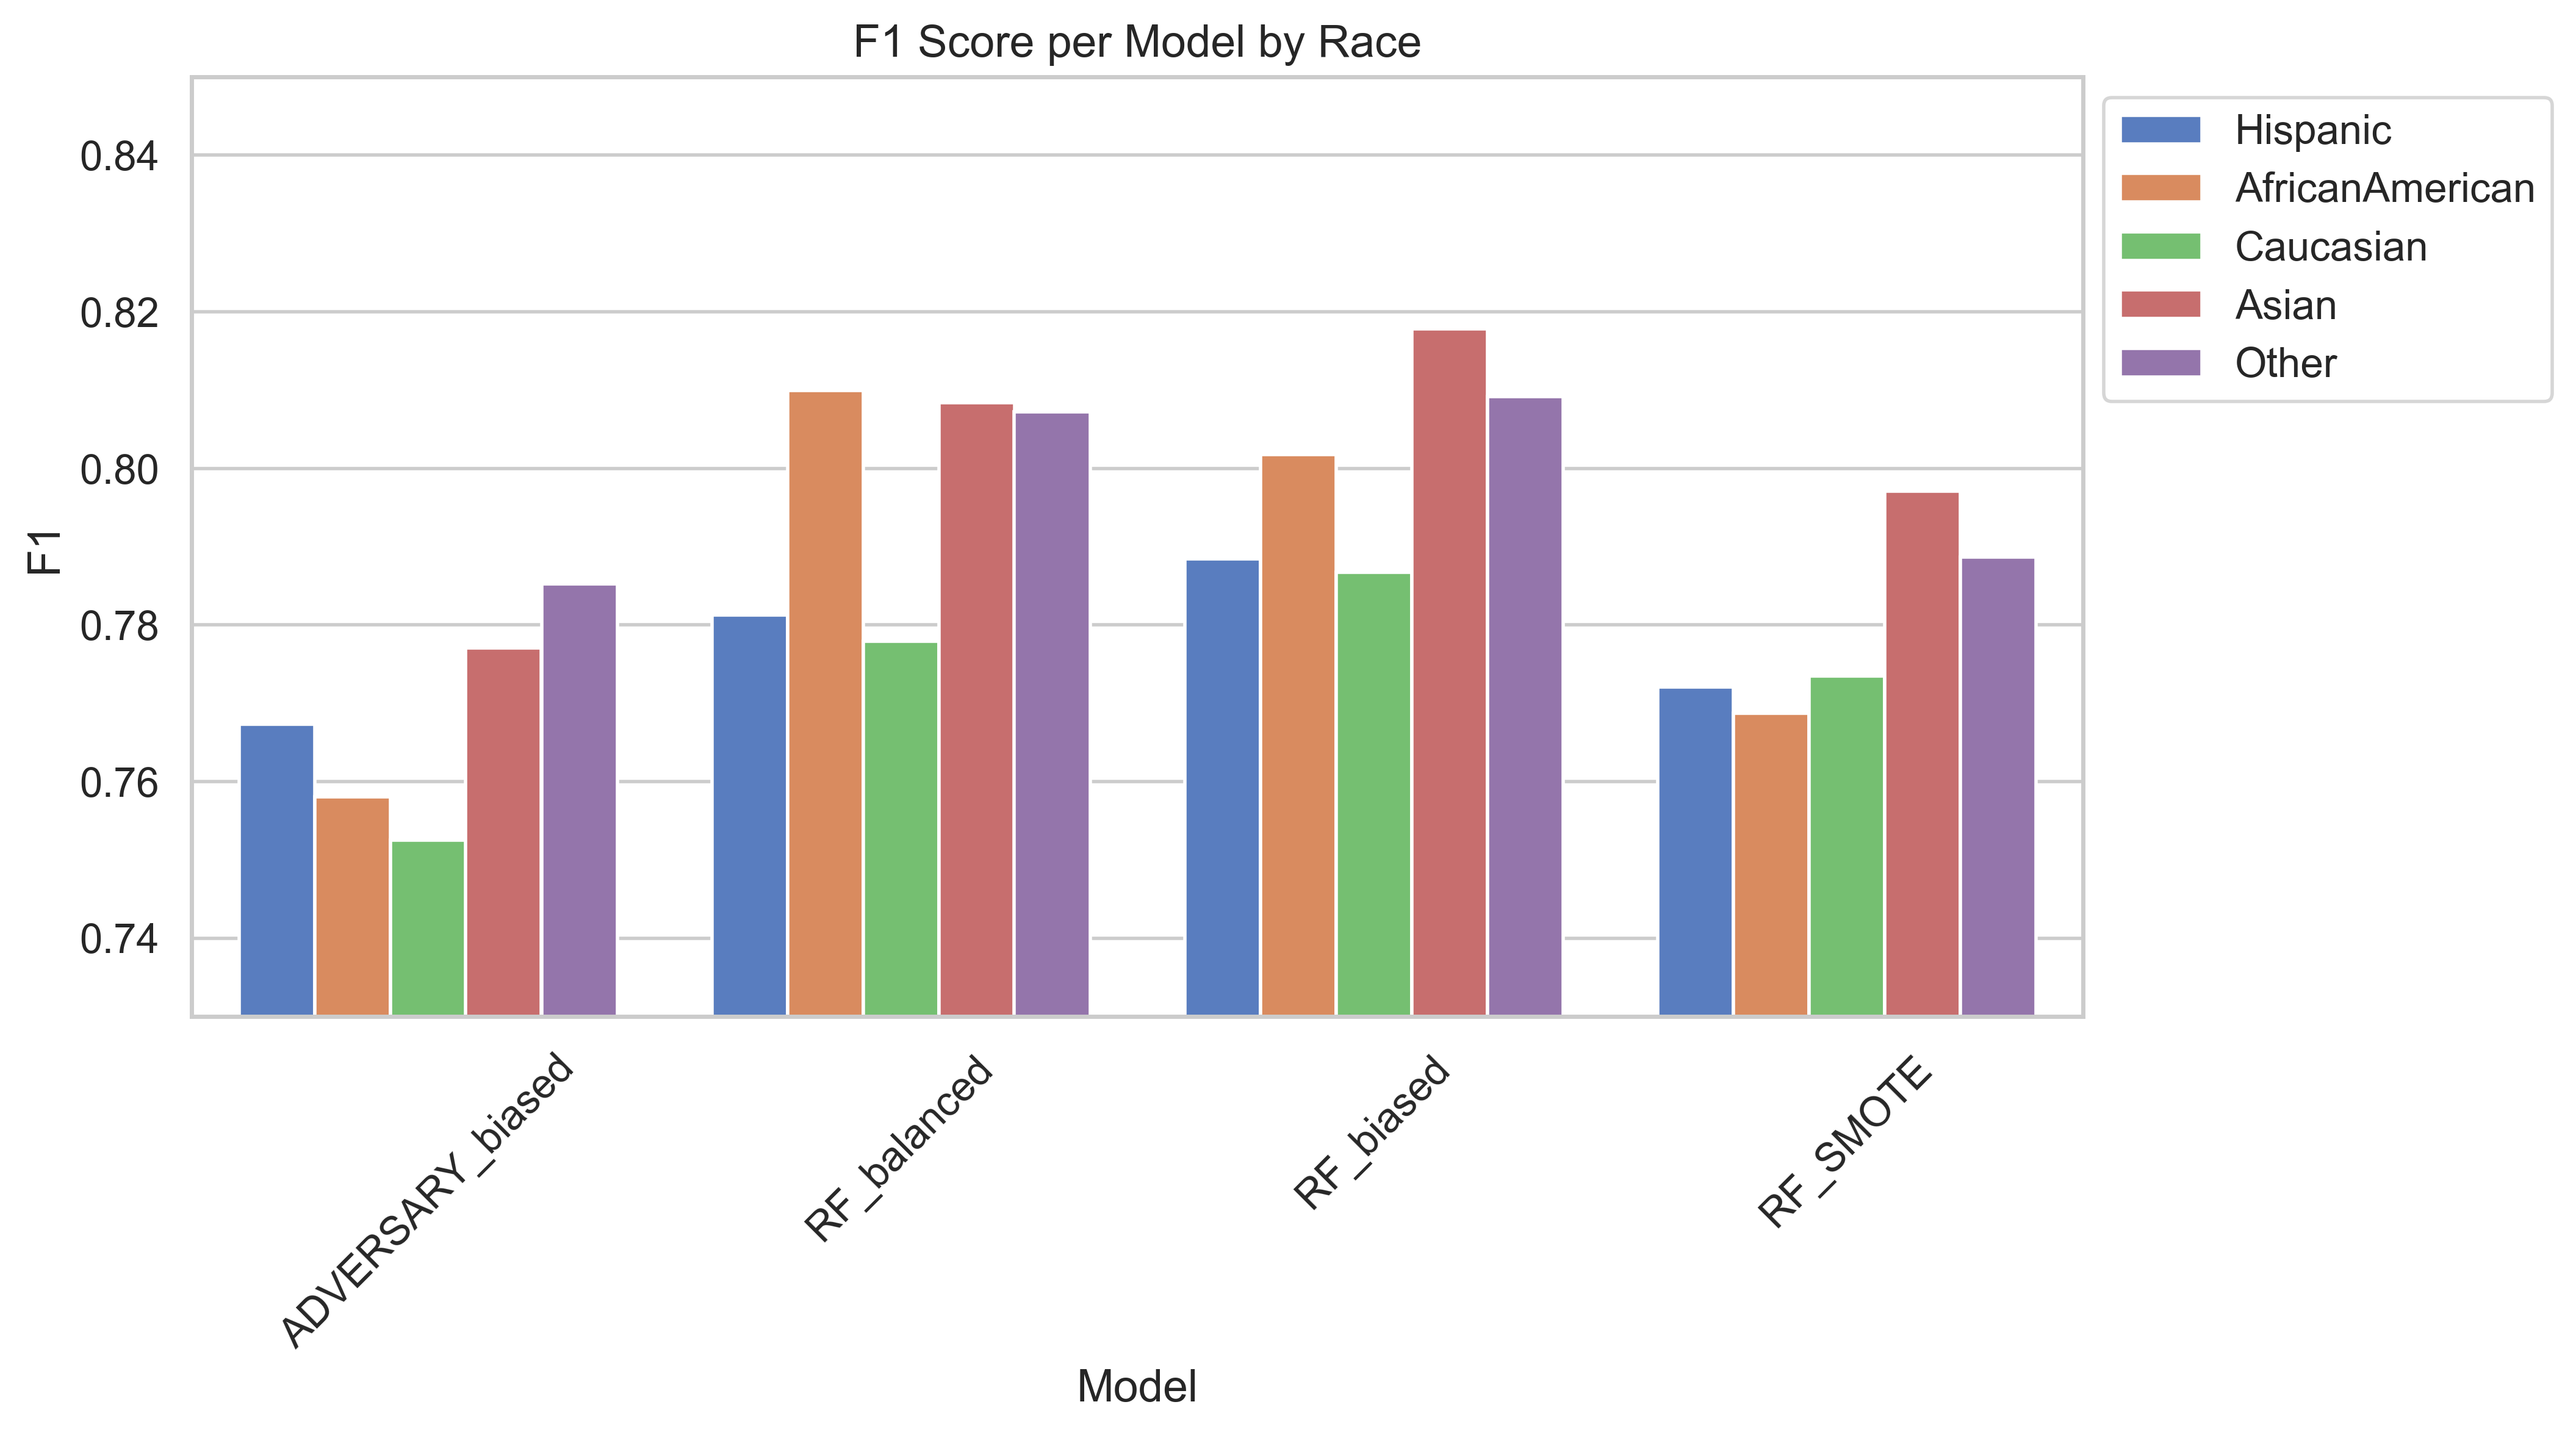

In [6]:
# 1. F1 Scores
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="F1", hue="Race")
plt.title("F1 Score per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.73,0.85)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

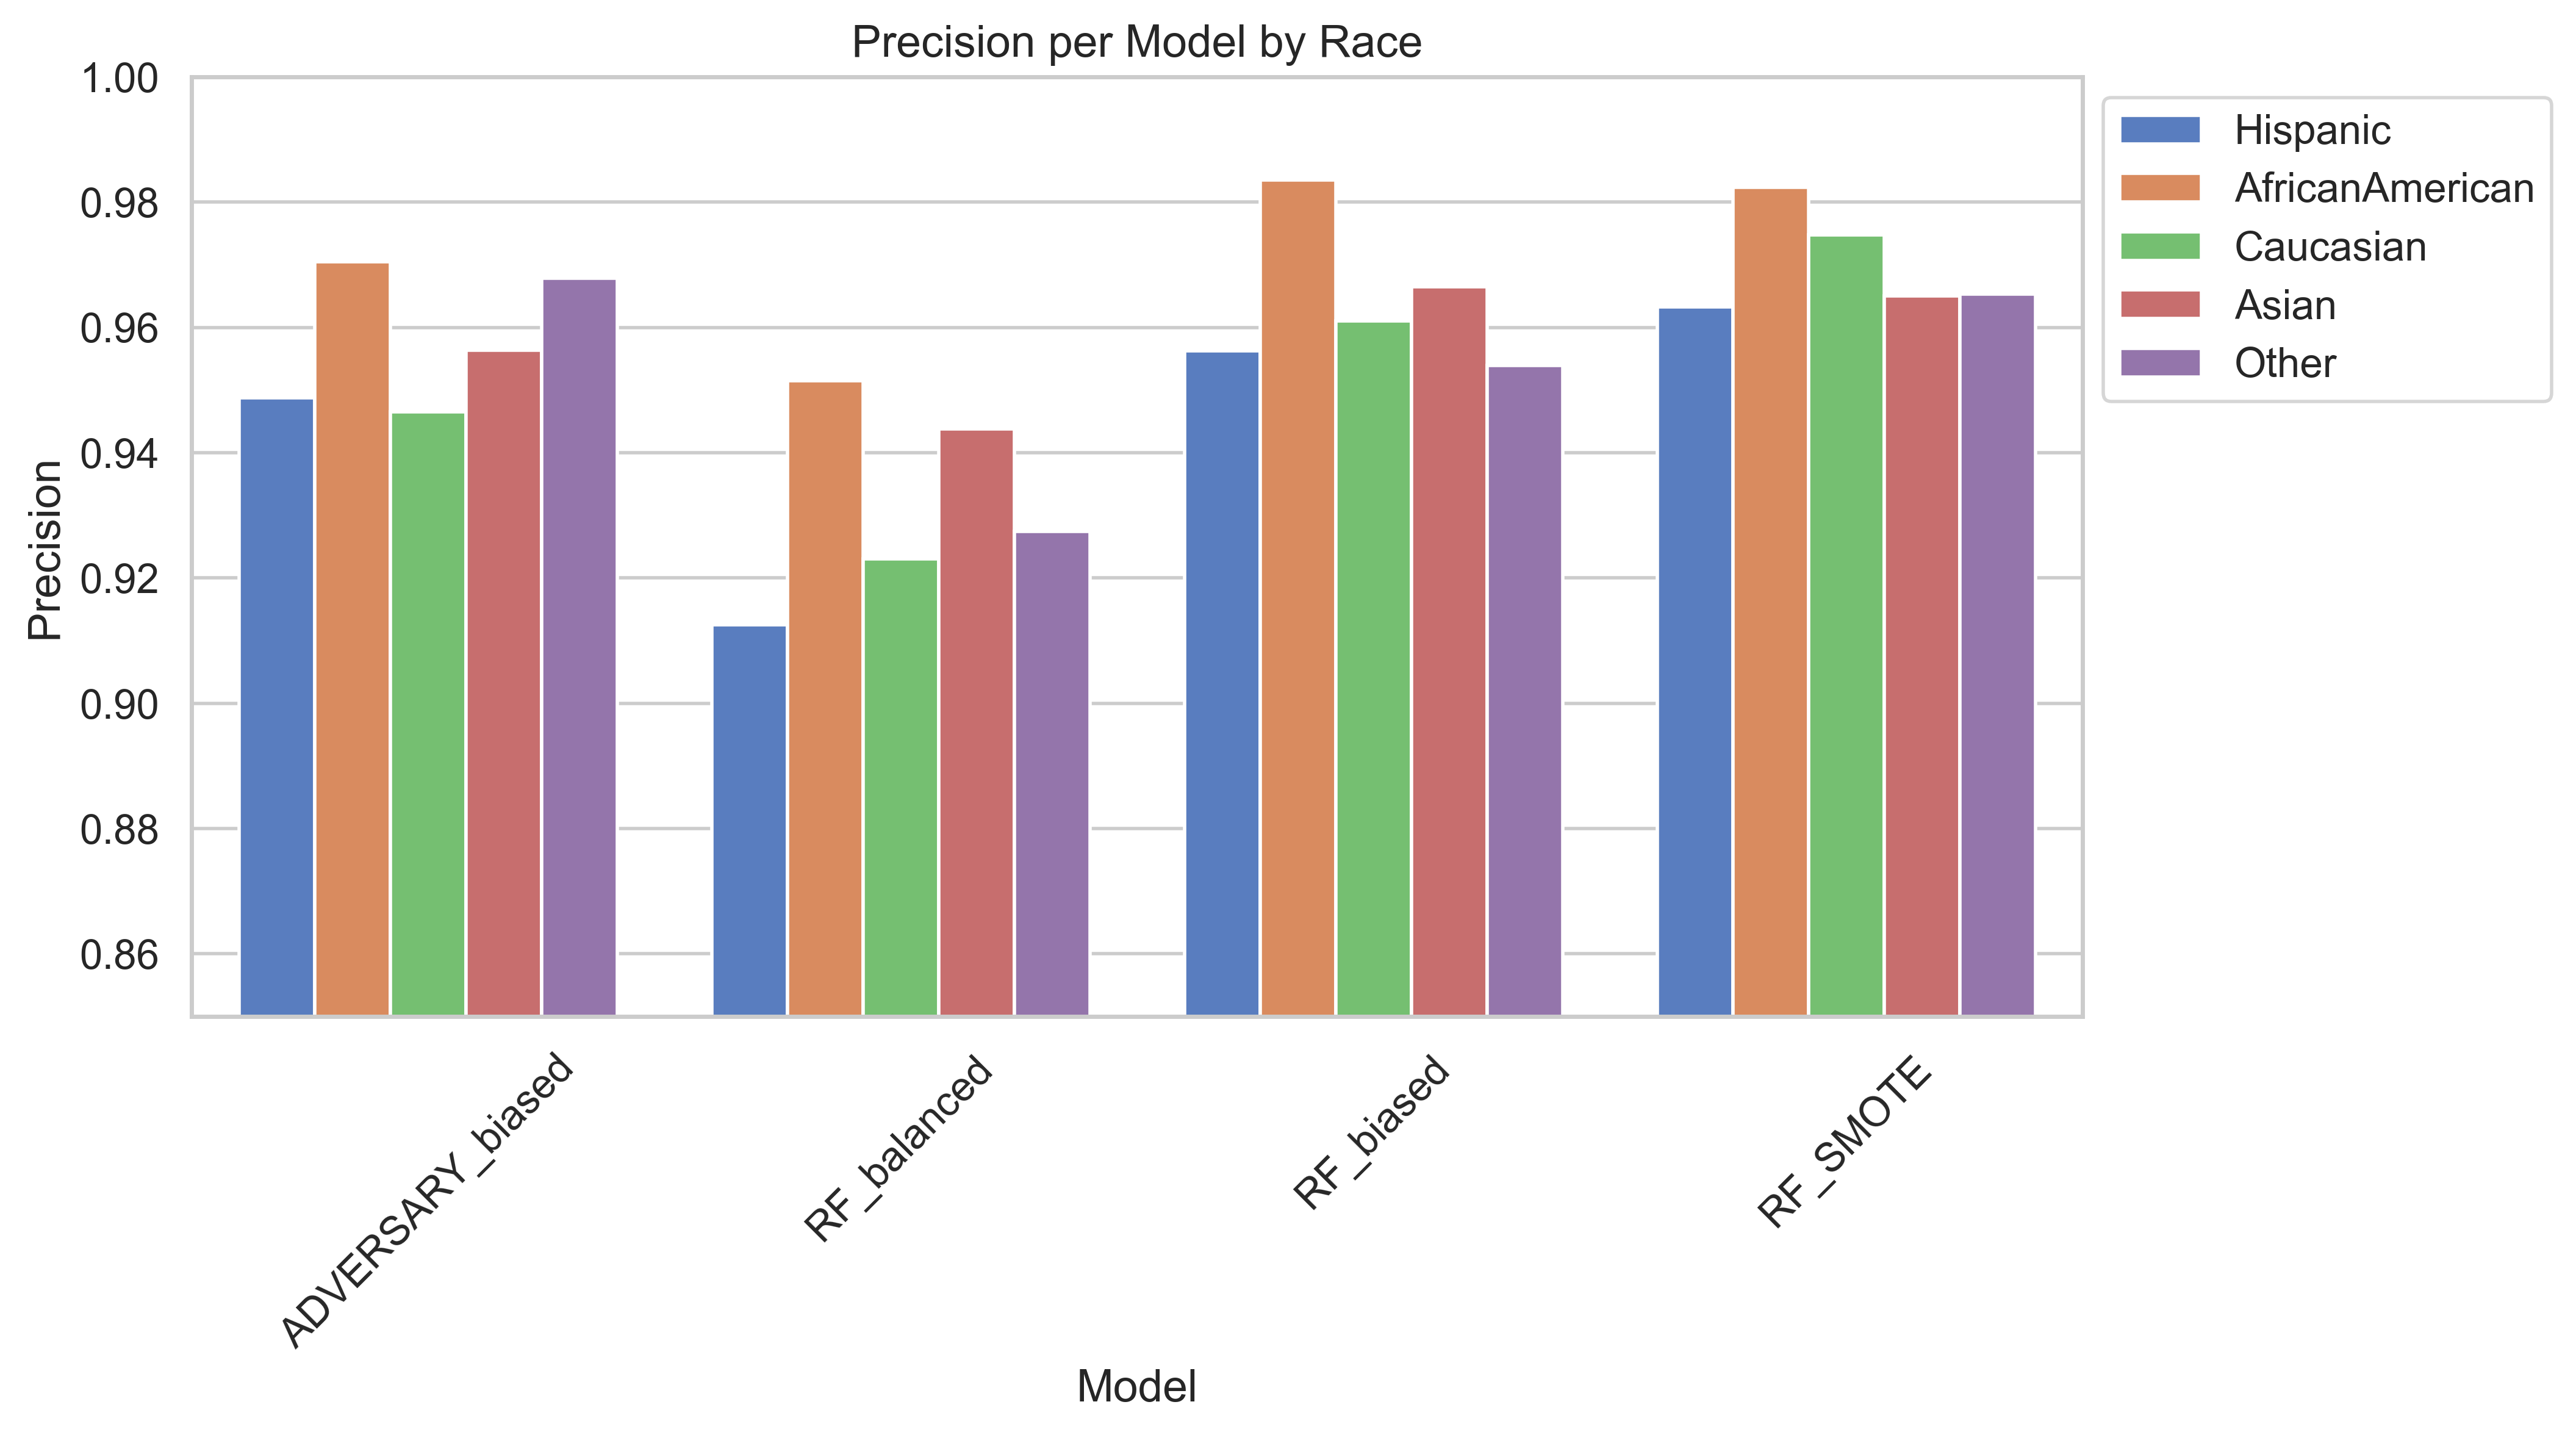

In [8]:
# 2. Precision
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="Precision", hue="Race")
plt.title("Precision per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.85, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

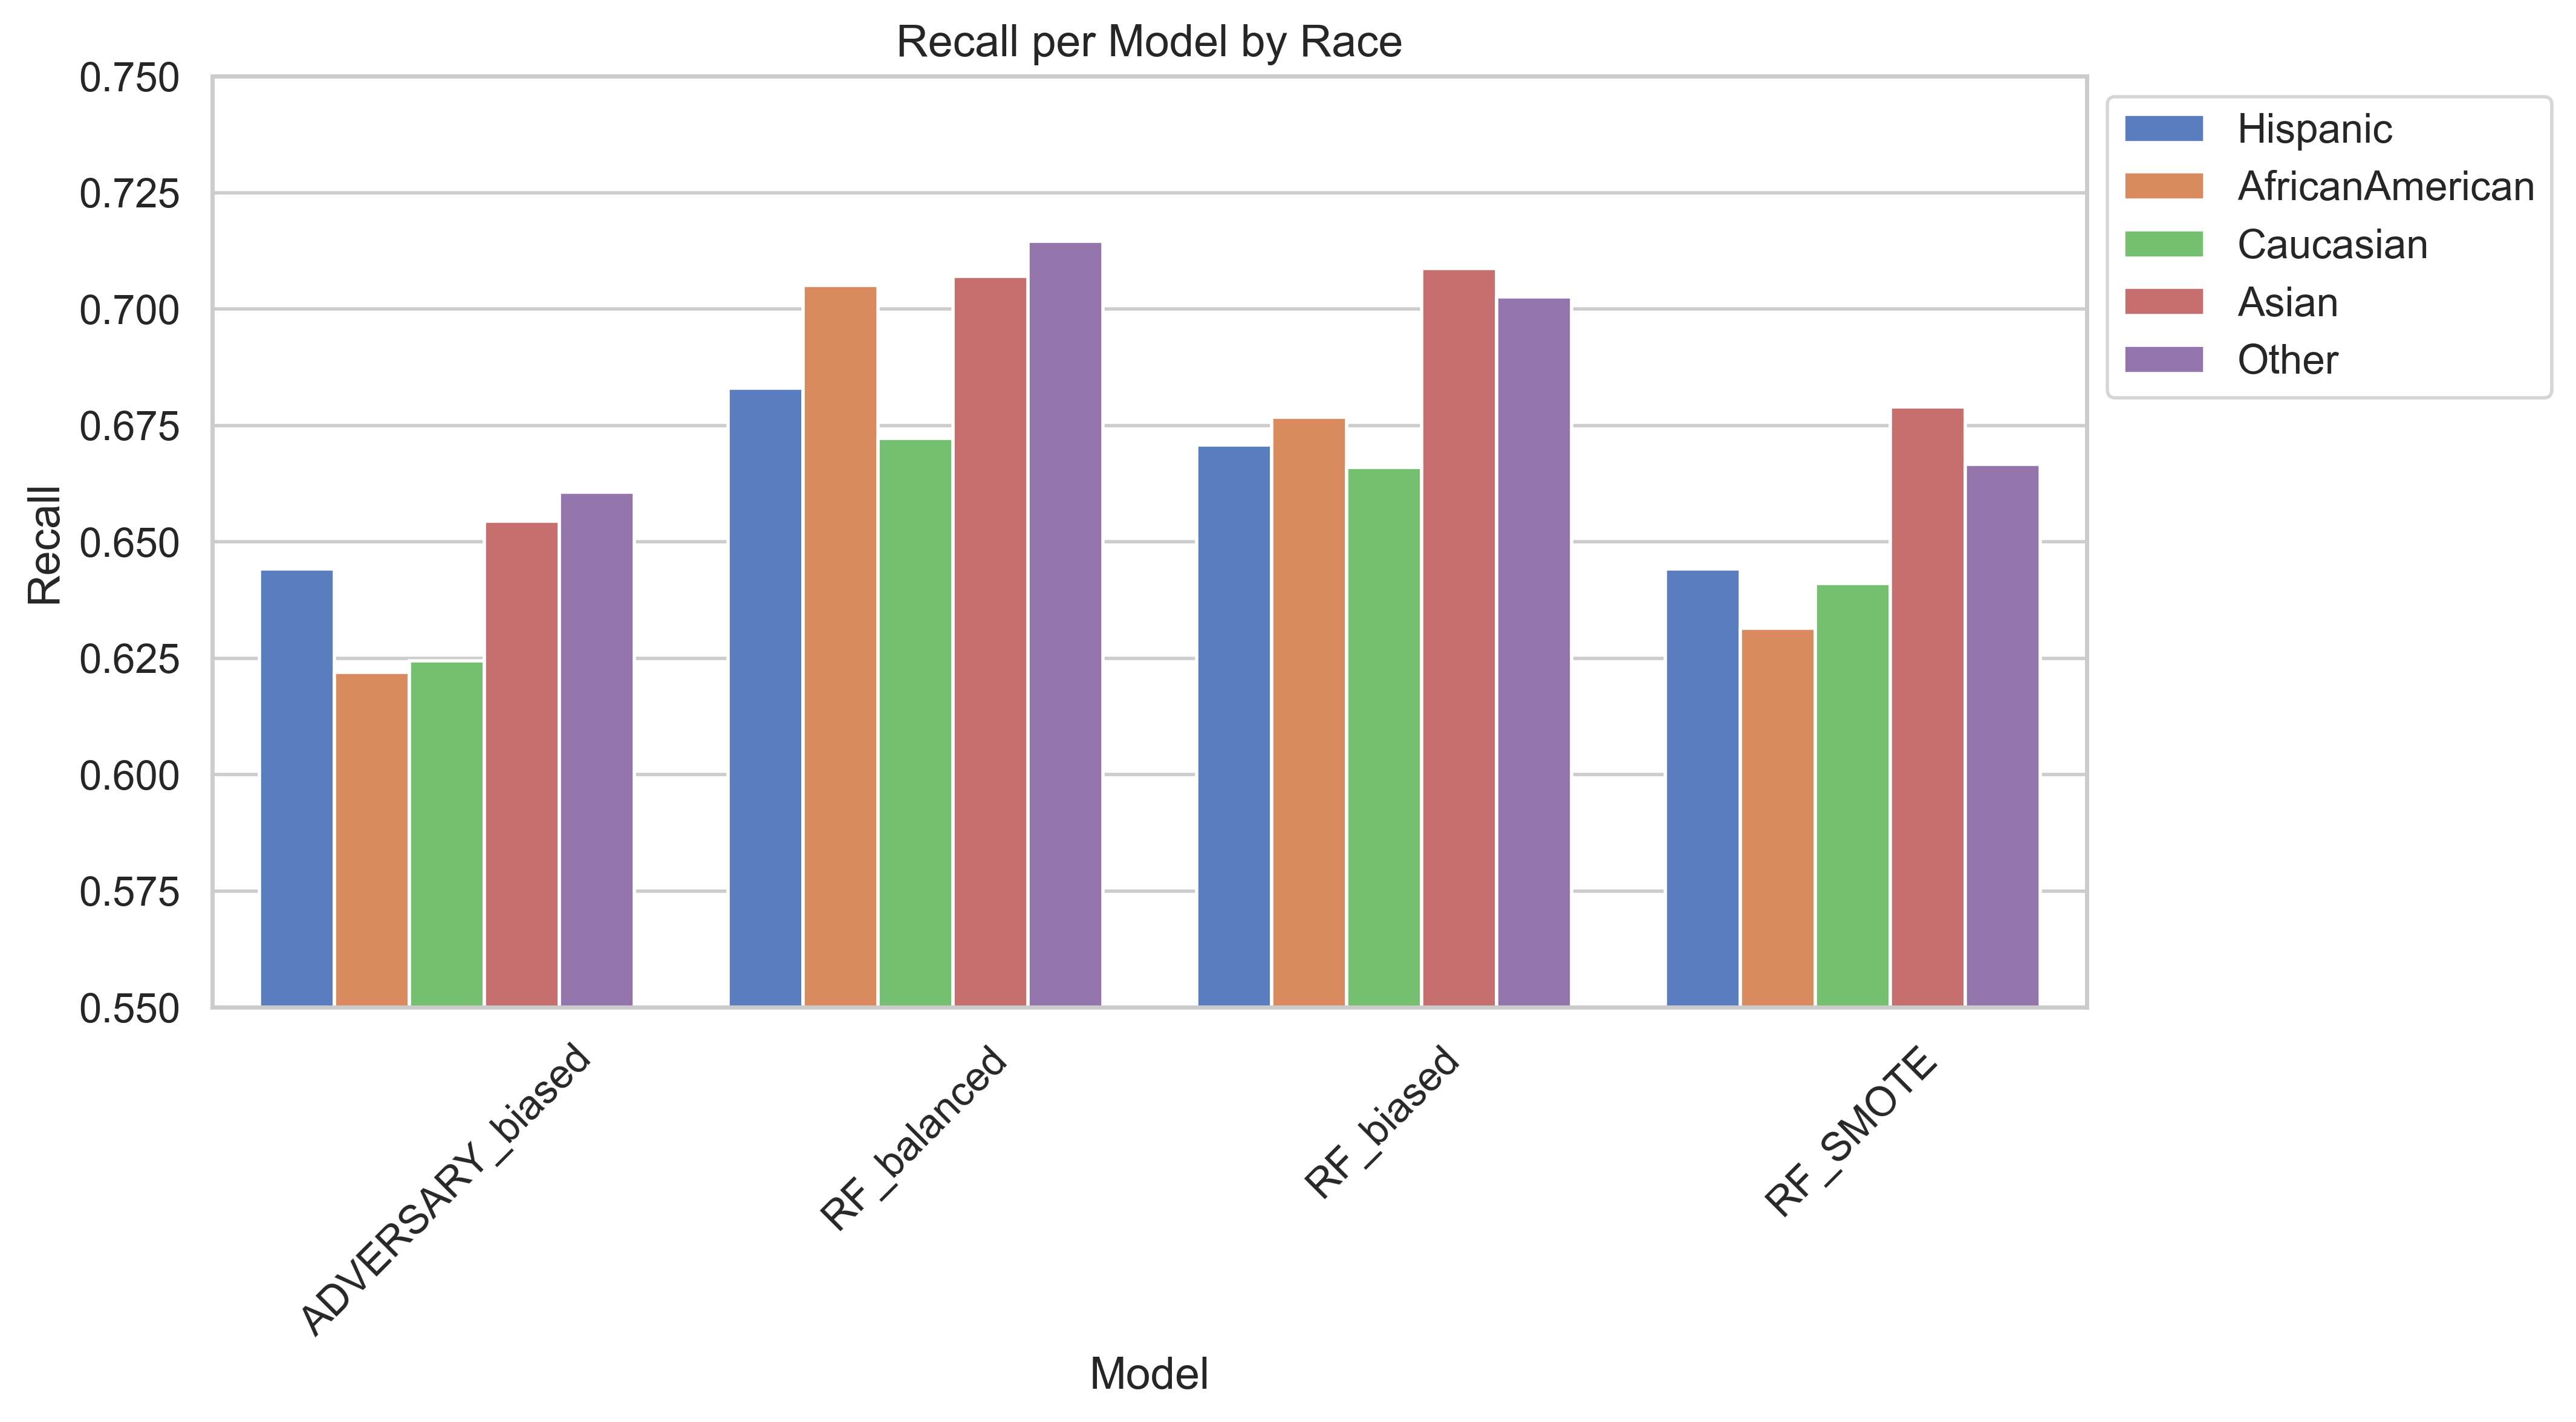

In [11]:
# 3. Recall
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="Recall", hue="Race")
plt.title("Recall per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.55,0.75)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

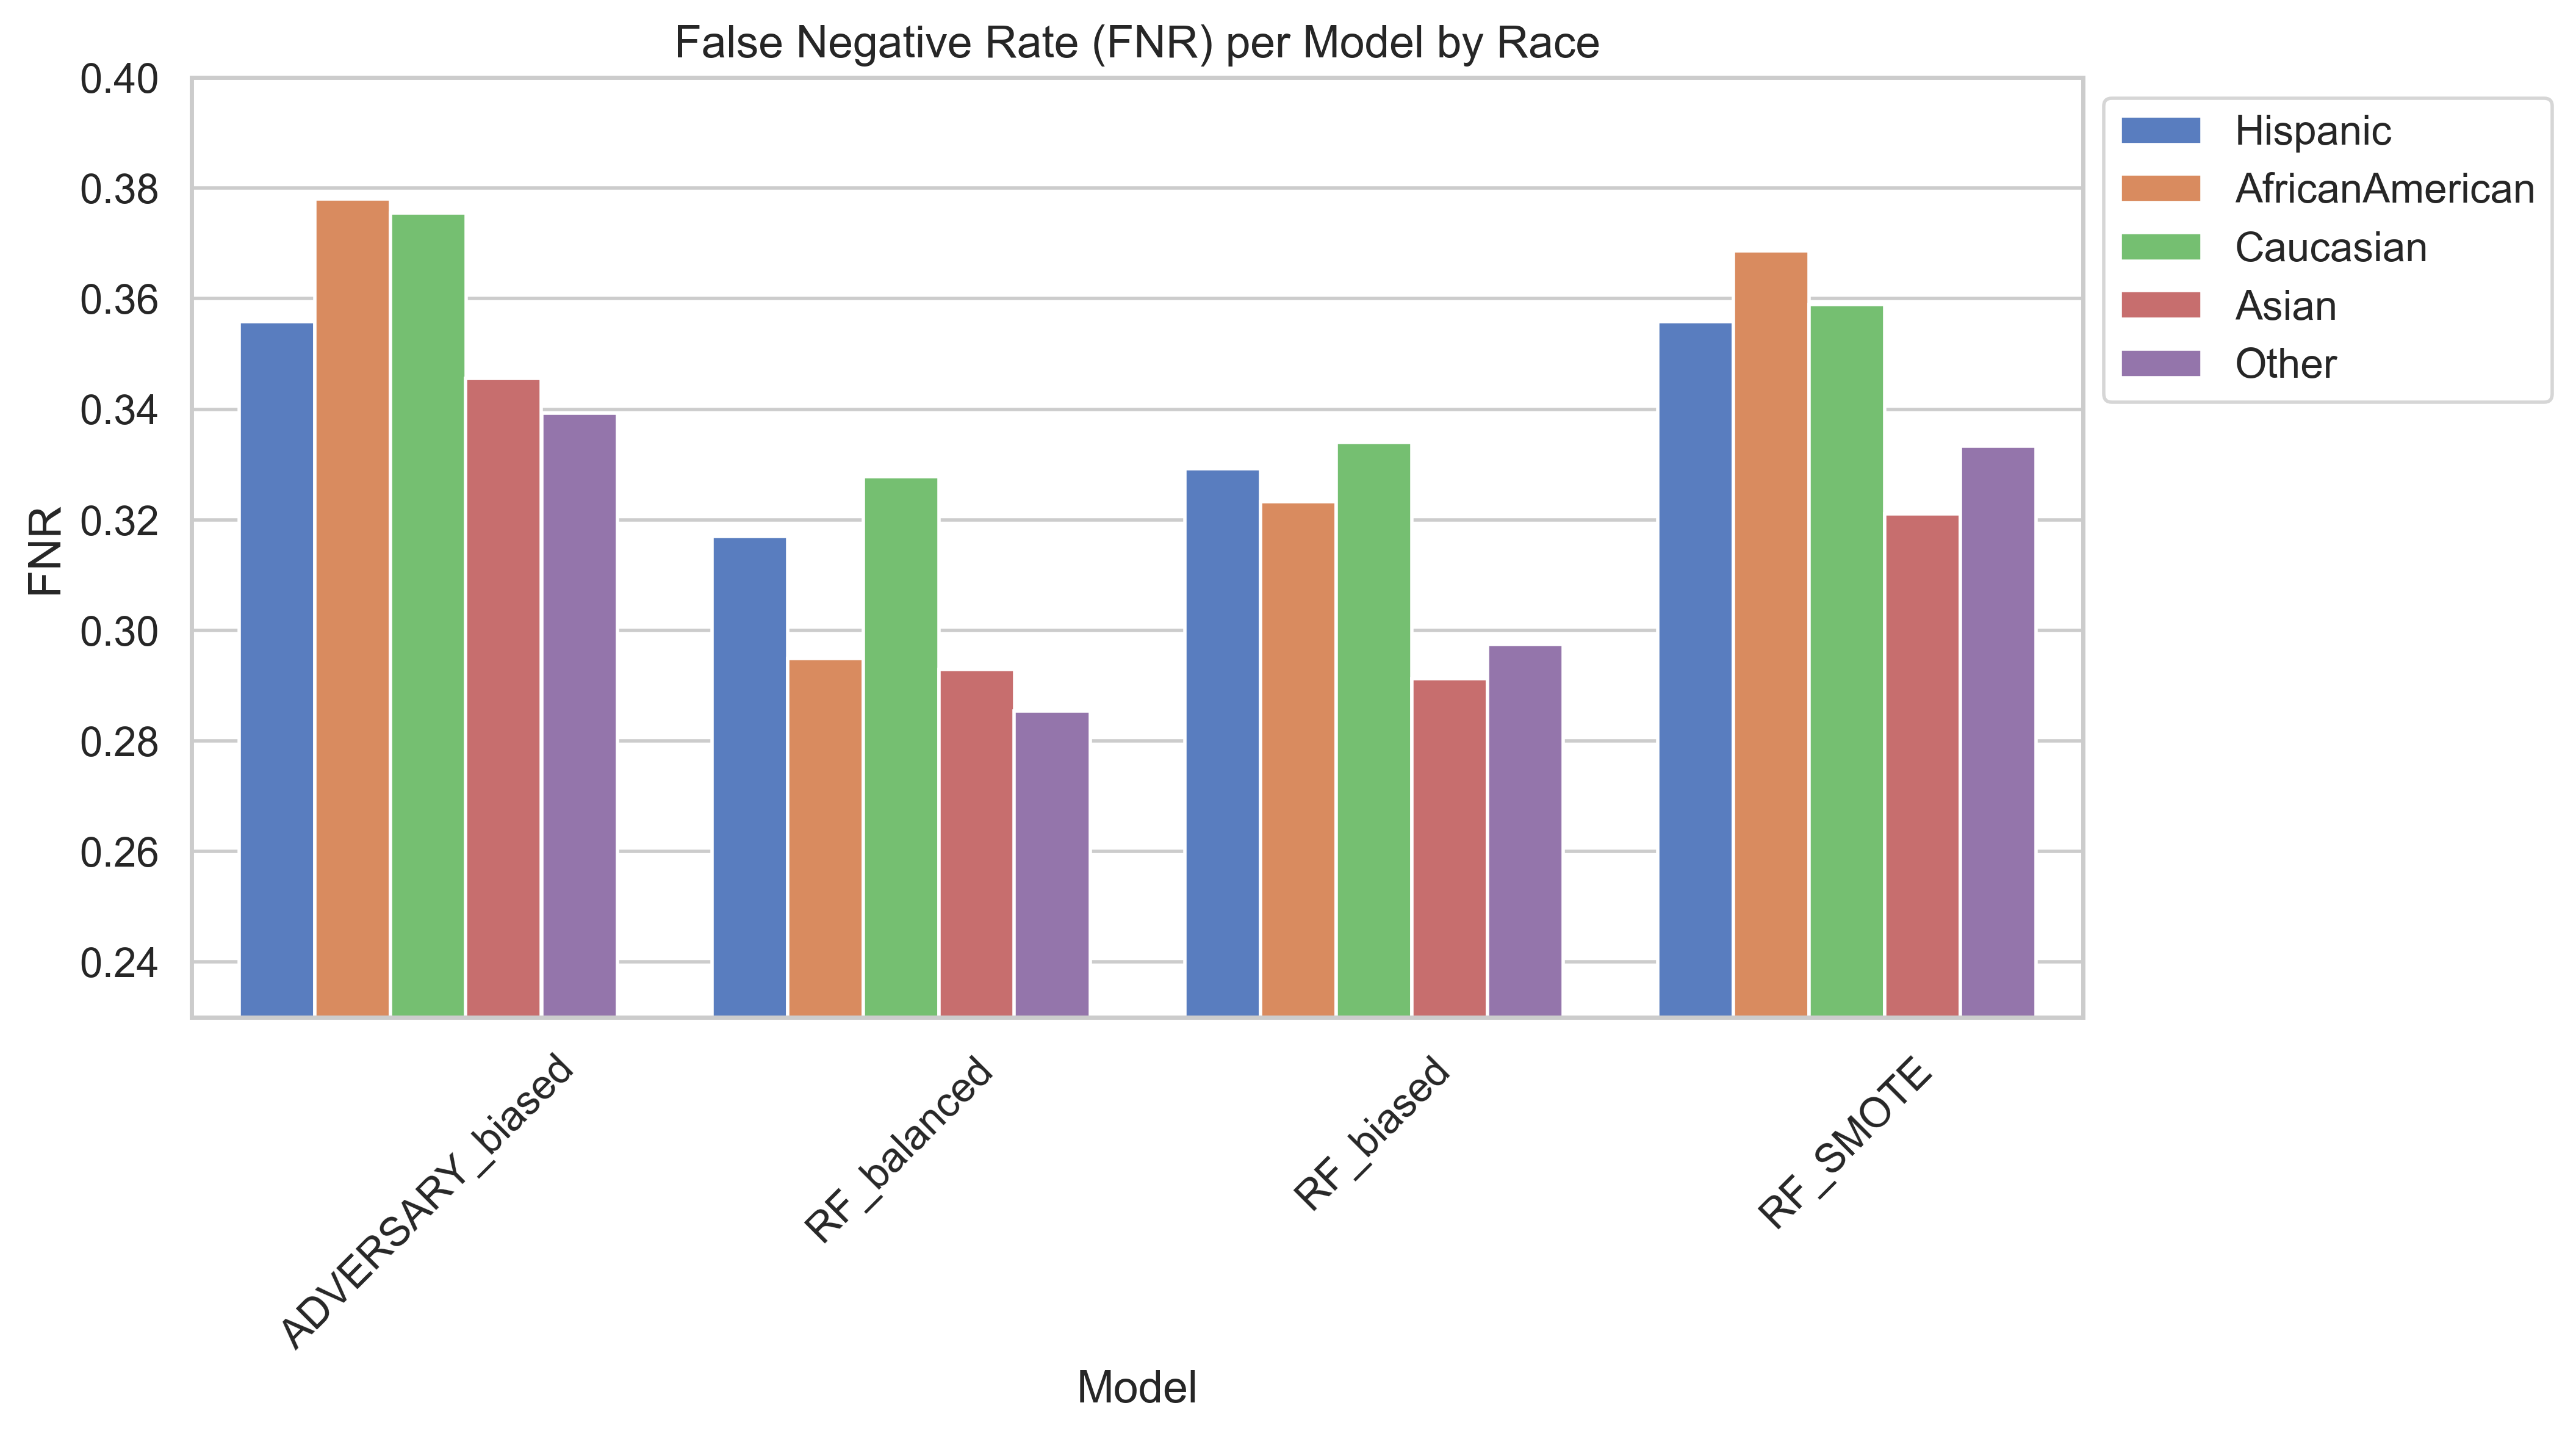

In [13]:
# 4. FNR Parity
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="FNR", hue="Race")
plt.title("False Negative Rate (FNR) per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.23,0.4)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

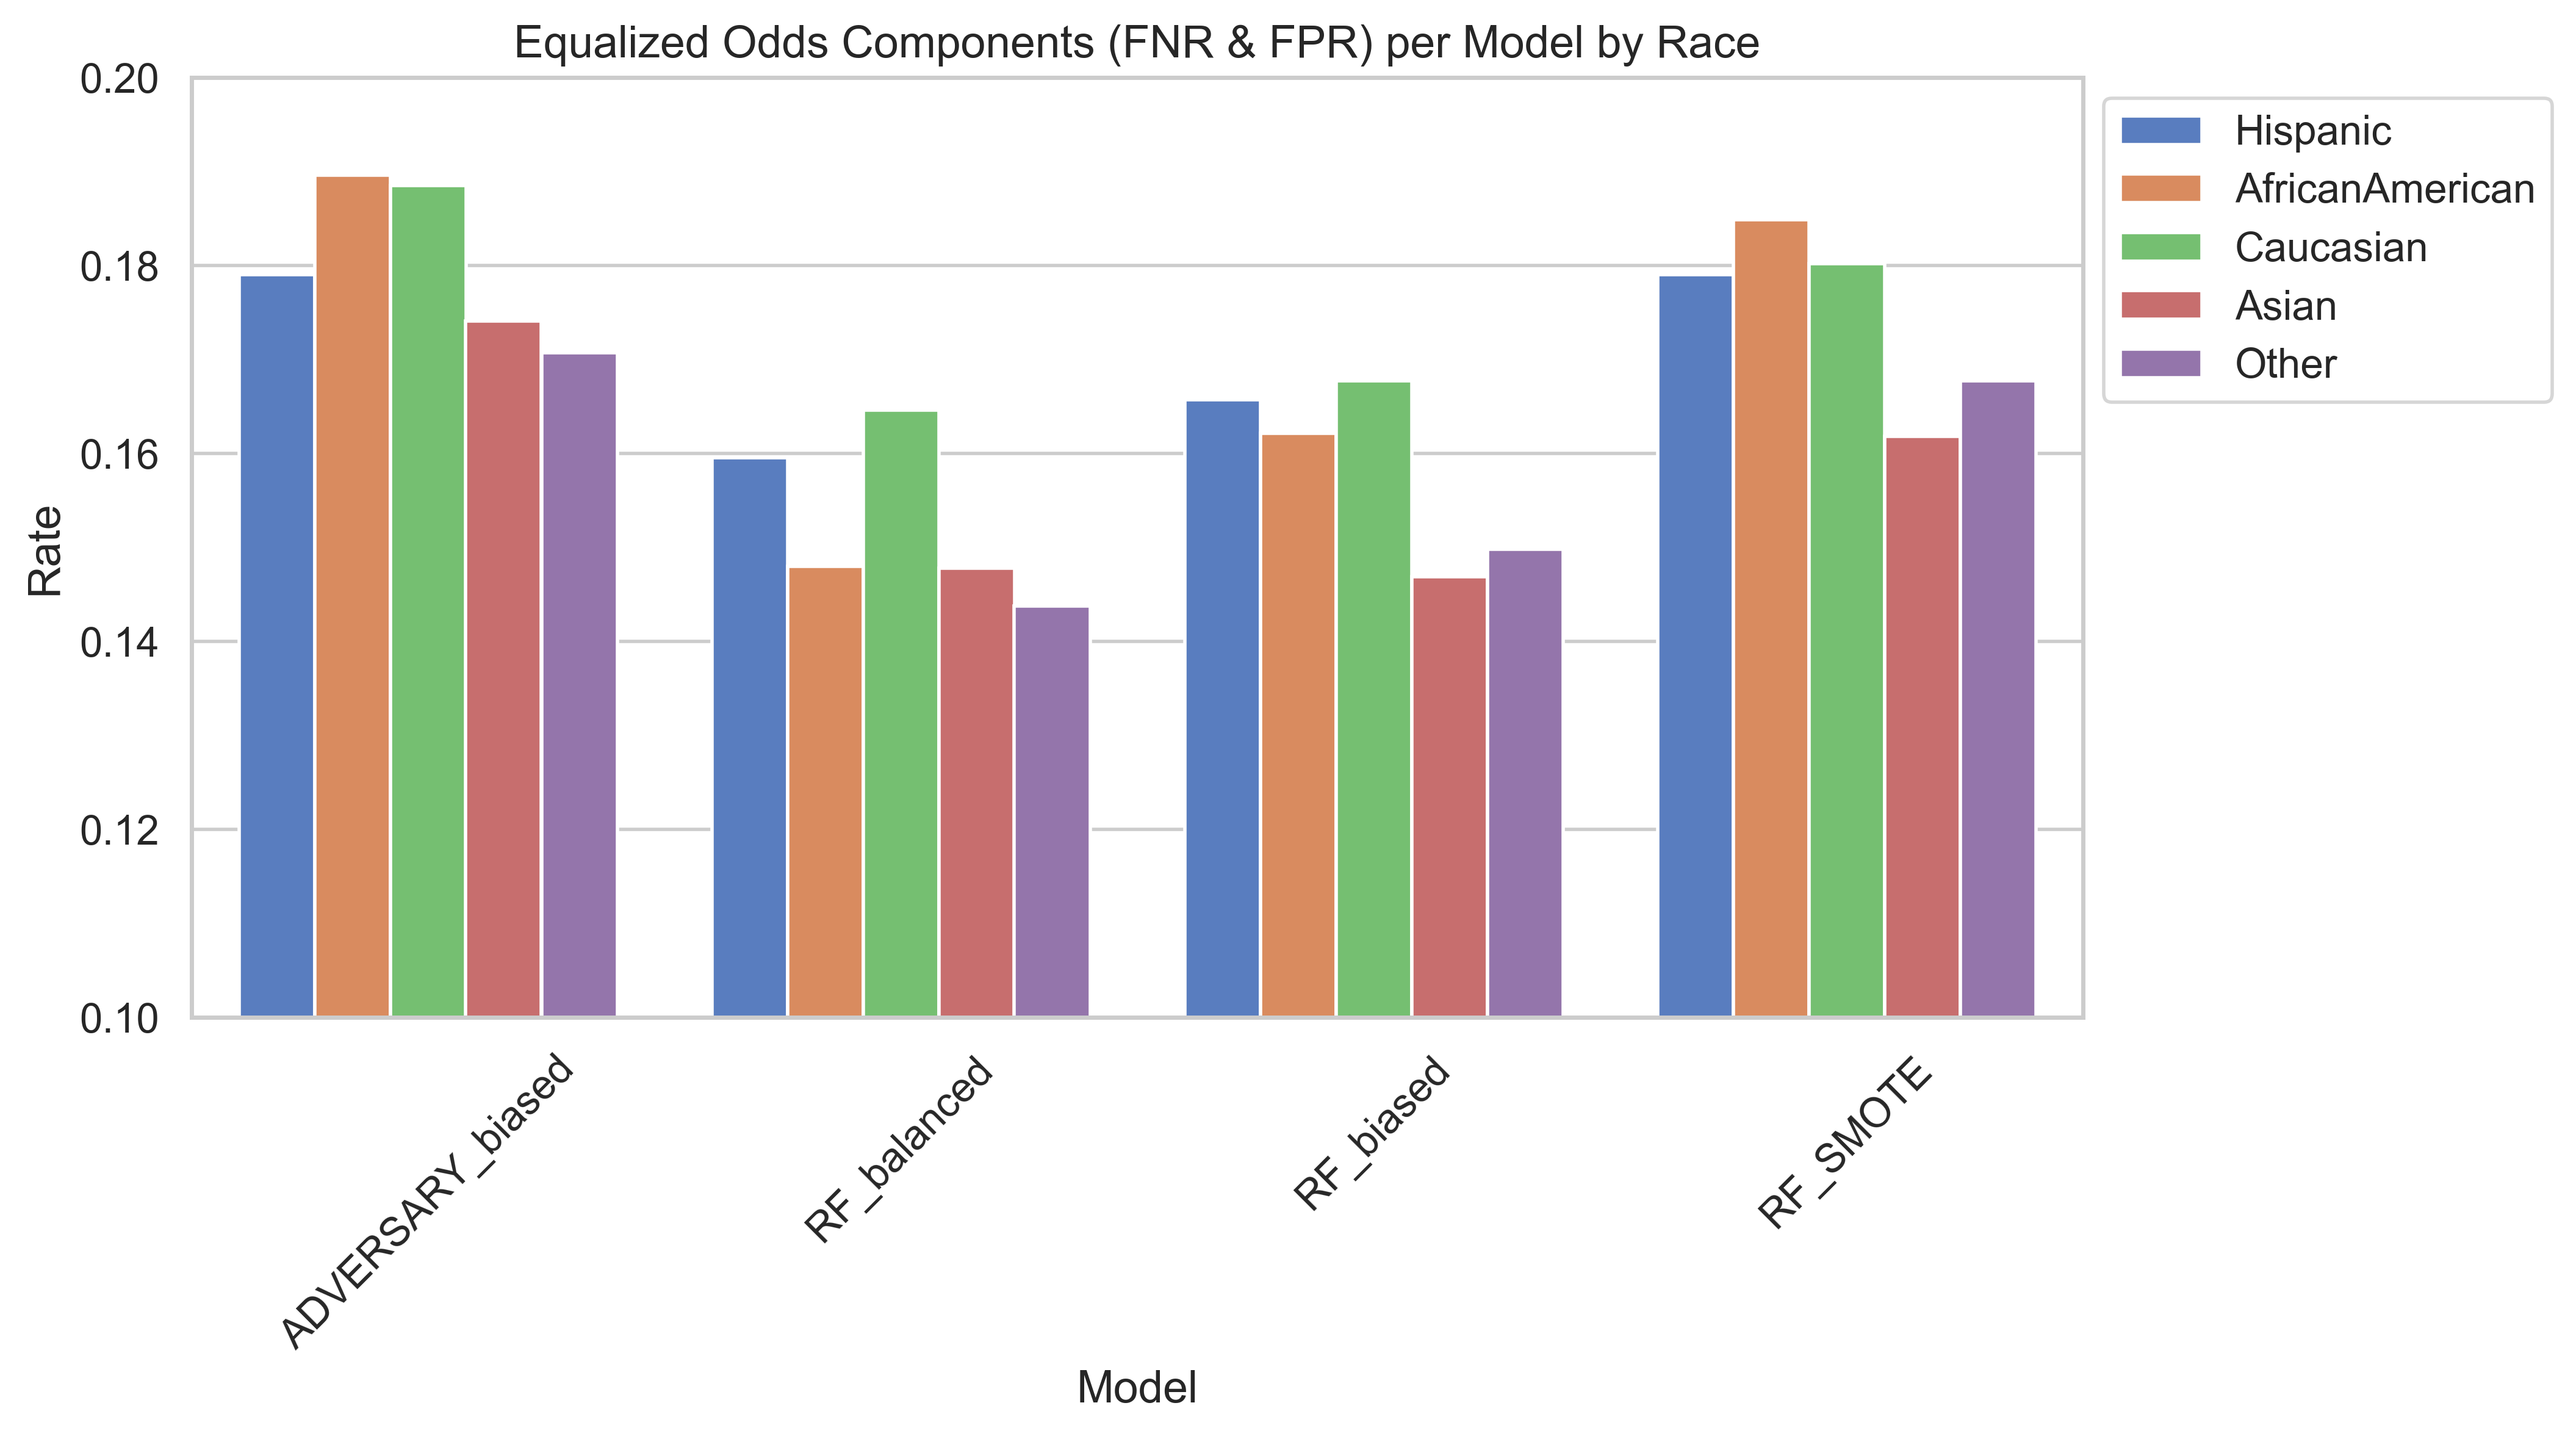

In [15]:
# 5. Equalized Odds
# Equalized odds: difference in TPR and FPR between races (here simplified as FNR parity & FPR parity)
# FPR computation
def fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn) if (fp + tn) > 0 else np.nan

metrics_df['FPR'] = metrics_df.apply(lambda row: fpr(
    df[df['race']==row['Race']]['True_Label'], df[df['race']==row['Race']]['Predicted_Label']
), axis=1)

plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df.melt(id_vars=['Model','Race'], value_vars=['FNR','FPR']),
            x='Model', y='value', hue='Race', ci=None)
plt.title("Equalized Odds Components (FNR & FPR) per Model by Race")
plt.ylabel("Rate")
plt.xticks(rotation=45)
plt.ylim(0.1,0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

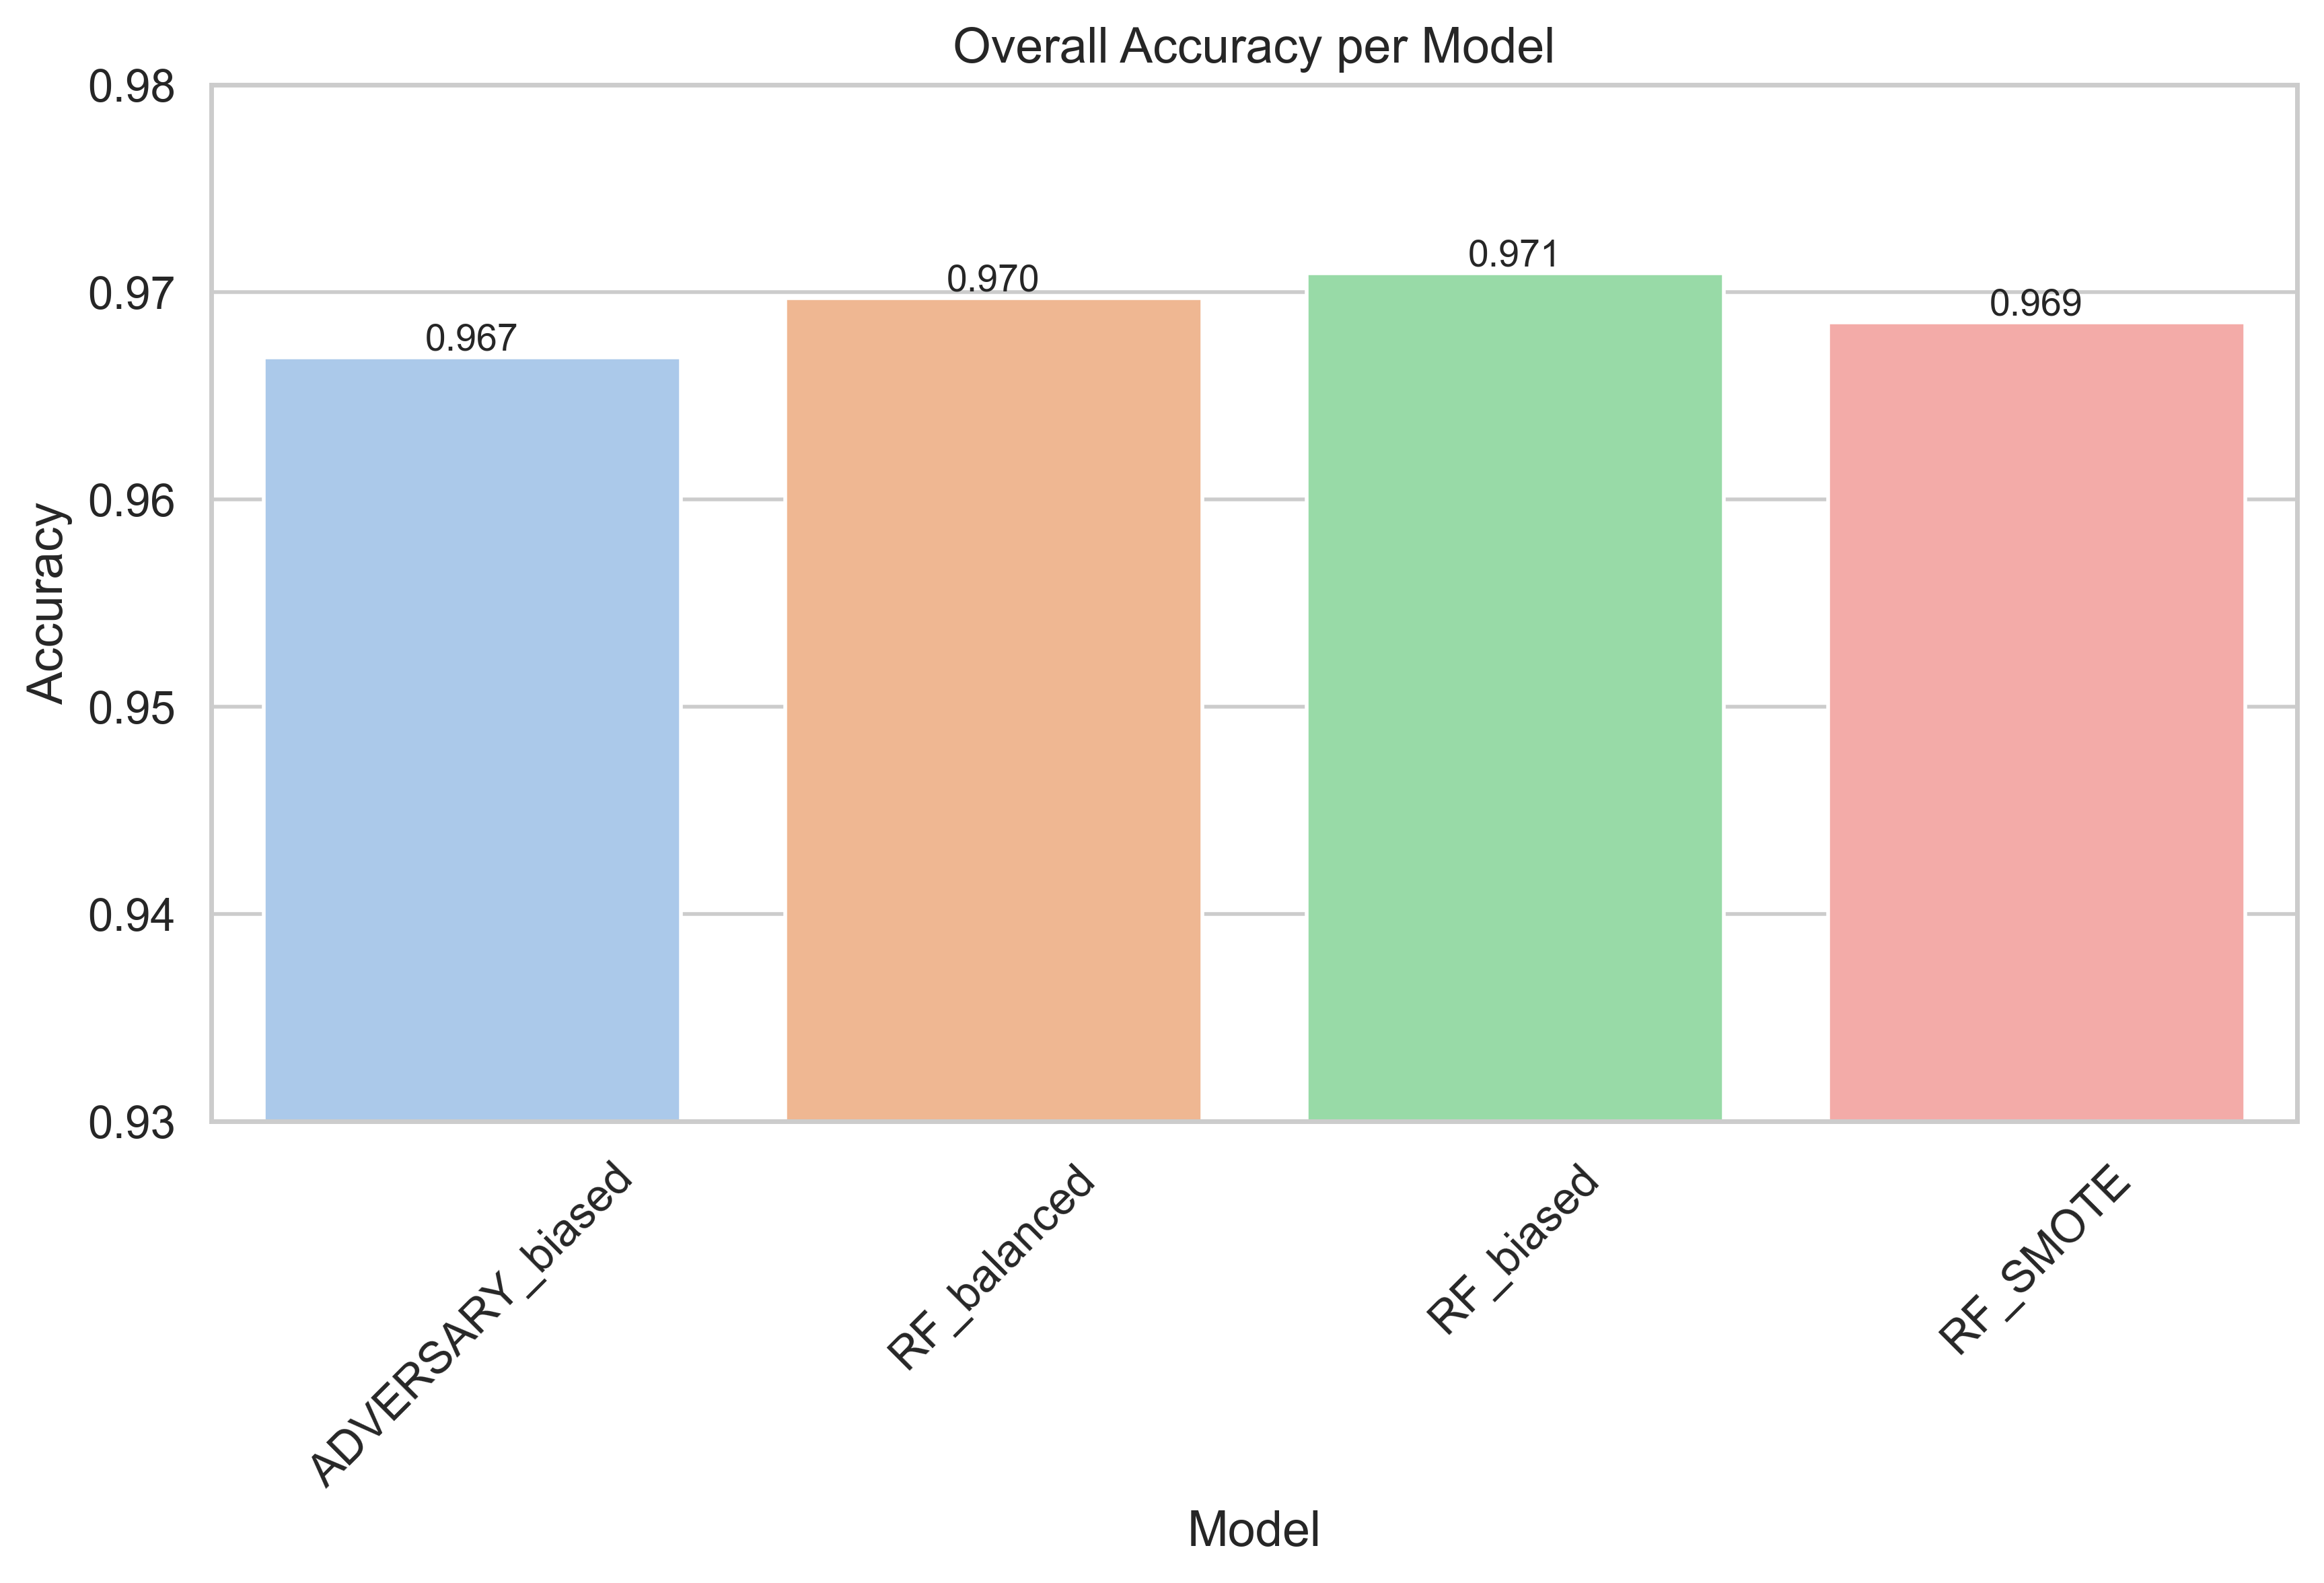

In [17]:
accuracy_list = [] 
for model_name, path in files.items(): 
    df = pd.read_csv(path) 
    y_true = df['True_Label'] 
    y_pred = df['Predicted_Label'] 
    acc = (y_true == y_pred).mean() 
    accuracy_list.append({"Model": model_name, "Accuracy": acc})     
accuracy_df = pd.DataFrame(accuracy_list)

plt.figure(figsize=(10,5), dpi=400)
ax = sns.barplot(data=accuracy_df, x="Model", y="Accuracy", palette="pastel")
plt.title("Overall Accuracy per Model")
plt.xticks(rotation=45)
plt.ylim(0.93, 0.98)

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.3f}",  # format with 3 decimals
                (p.get_x() + p.get_width() / 2, height),  # x,y coords
                ha='center', va='bottom',  # align center, above bar
                fontsize=10)

# Legend (not strictly needed here since no hue)
plt.legend().remove()  # remove if not needed
plt.show()


# Logistic Regression

In [12]:
# File mapping for clarity
files = {
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
    "LR_balanced": "inference/LR_balanced.csv",
    "LR_biased": "inference/LR_biased.csv",
    "LR_SMOTE": "inference/LR_SMOTE.csv",
    # "RF_balanced": "inference/RF_balanced.csv",
    # "RF_biased": "inference/RF_biased.csv",
    # "RF_SMOTE": "inference/RF_SMOTE.csv",
}

In [13]:
# Initialize a DataFrame to store metrics
metrics_list = []

# Helper function for FNR
def fnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn / (fn + tp) if (fn + tp) > 0 else np.nan

def tpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn) if (tp + fn) > 0 else np.nan

# Load CSVs and compute metrics
for model_name, path in files.items():
    df = pd.read_csv(path)
    for race in df['race'].unique():
        sub = df[df['race'] == race]
        y_true = sub['True_Label']
        y_pred = sub['Predicted_Label']
        metrics_list.append({
            "Model": model_name,
            "Race": race,
            "F1": f1_score(y_true, y_pred),
            "Precision": precision_score(y_true, y_pred),
            "Recall": recall_score(y_true, y_pred),
            "FNR": fnr(y_true, y_pred),
            "TPR": tpr(y_true, y_pred),
        })

metrics_df = pd.DataFrame(metrics_list)

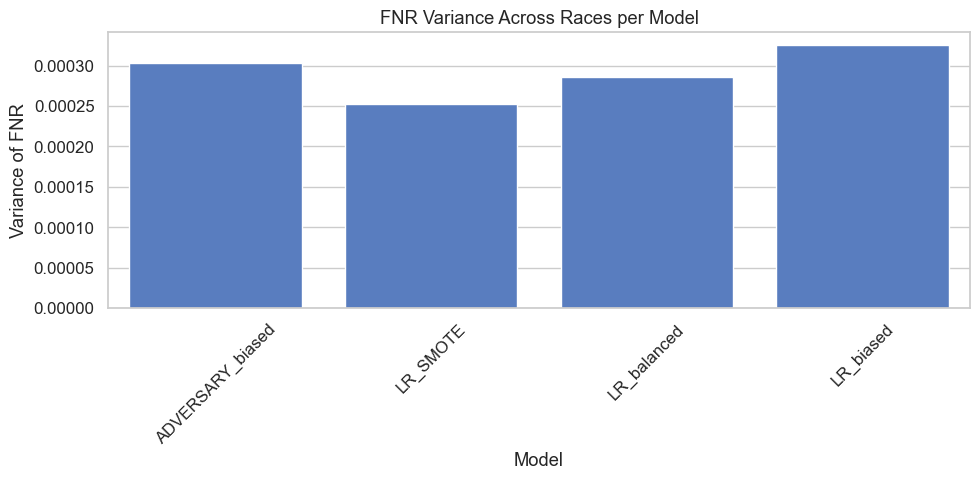

Model  FNR_Variance
0  ADVERSARY_biased      0.000303
1          LR_SMOTE      0.000253
2       LR_balanced      0.000286
3         LR_biased      0.000325

In [14]:
# --- FNR VARIANCE ACROSS RACES ---

# Compute variance of FNR for each model across its race groups
fnr_variance_df = (
    metrics_df.groupby("Model")["FNR"]
    .var()
    .reset_index()
    .rename(columns={"FNR": "FNR_Variance"})
)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=fnr_variance_df, x="Model", y="FNR_Variance")
plt.title("FNR Variance Across Races per Model")
plt.ylabel("Variance of FNR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fnr_variance_df


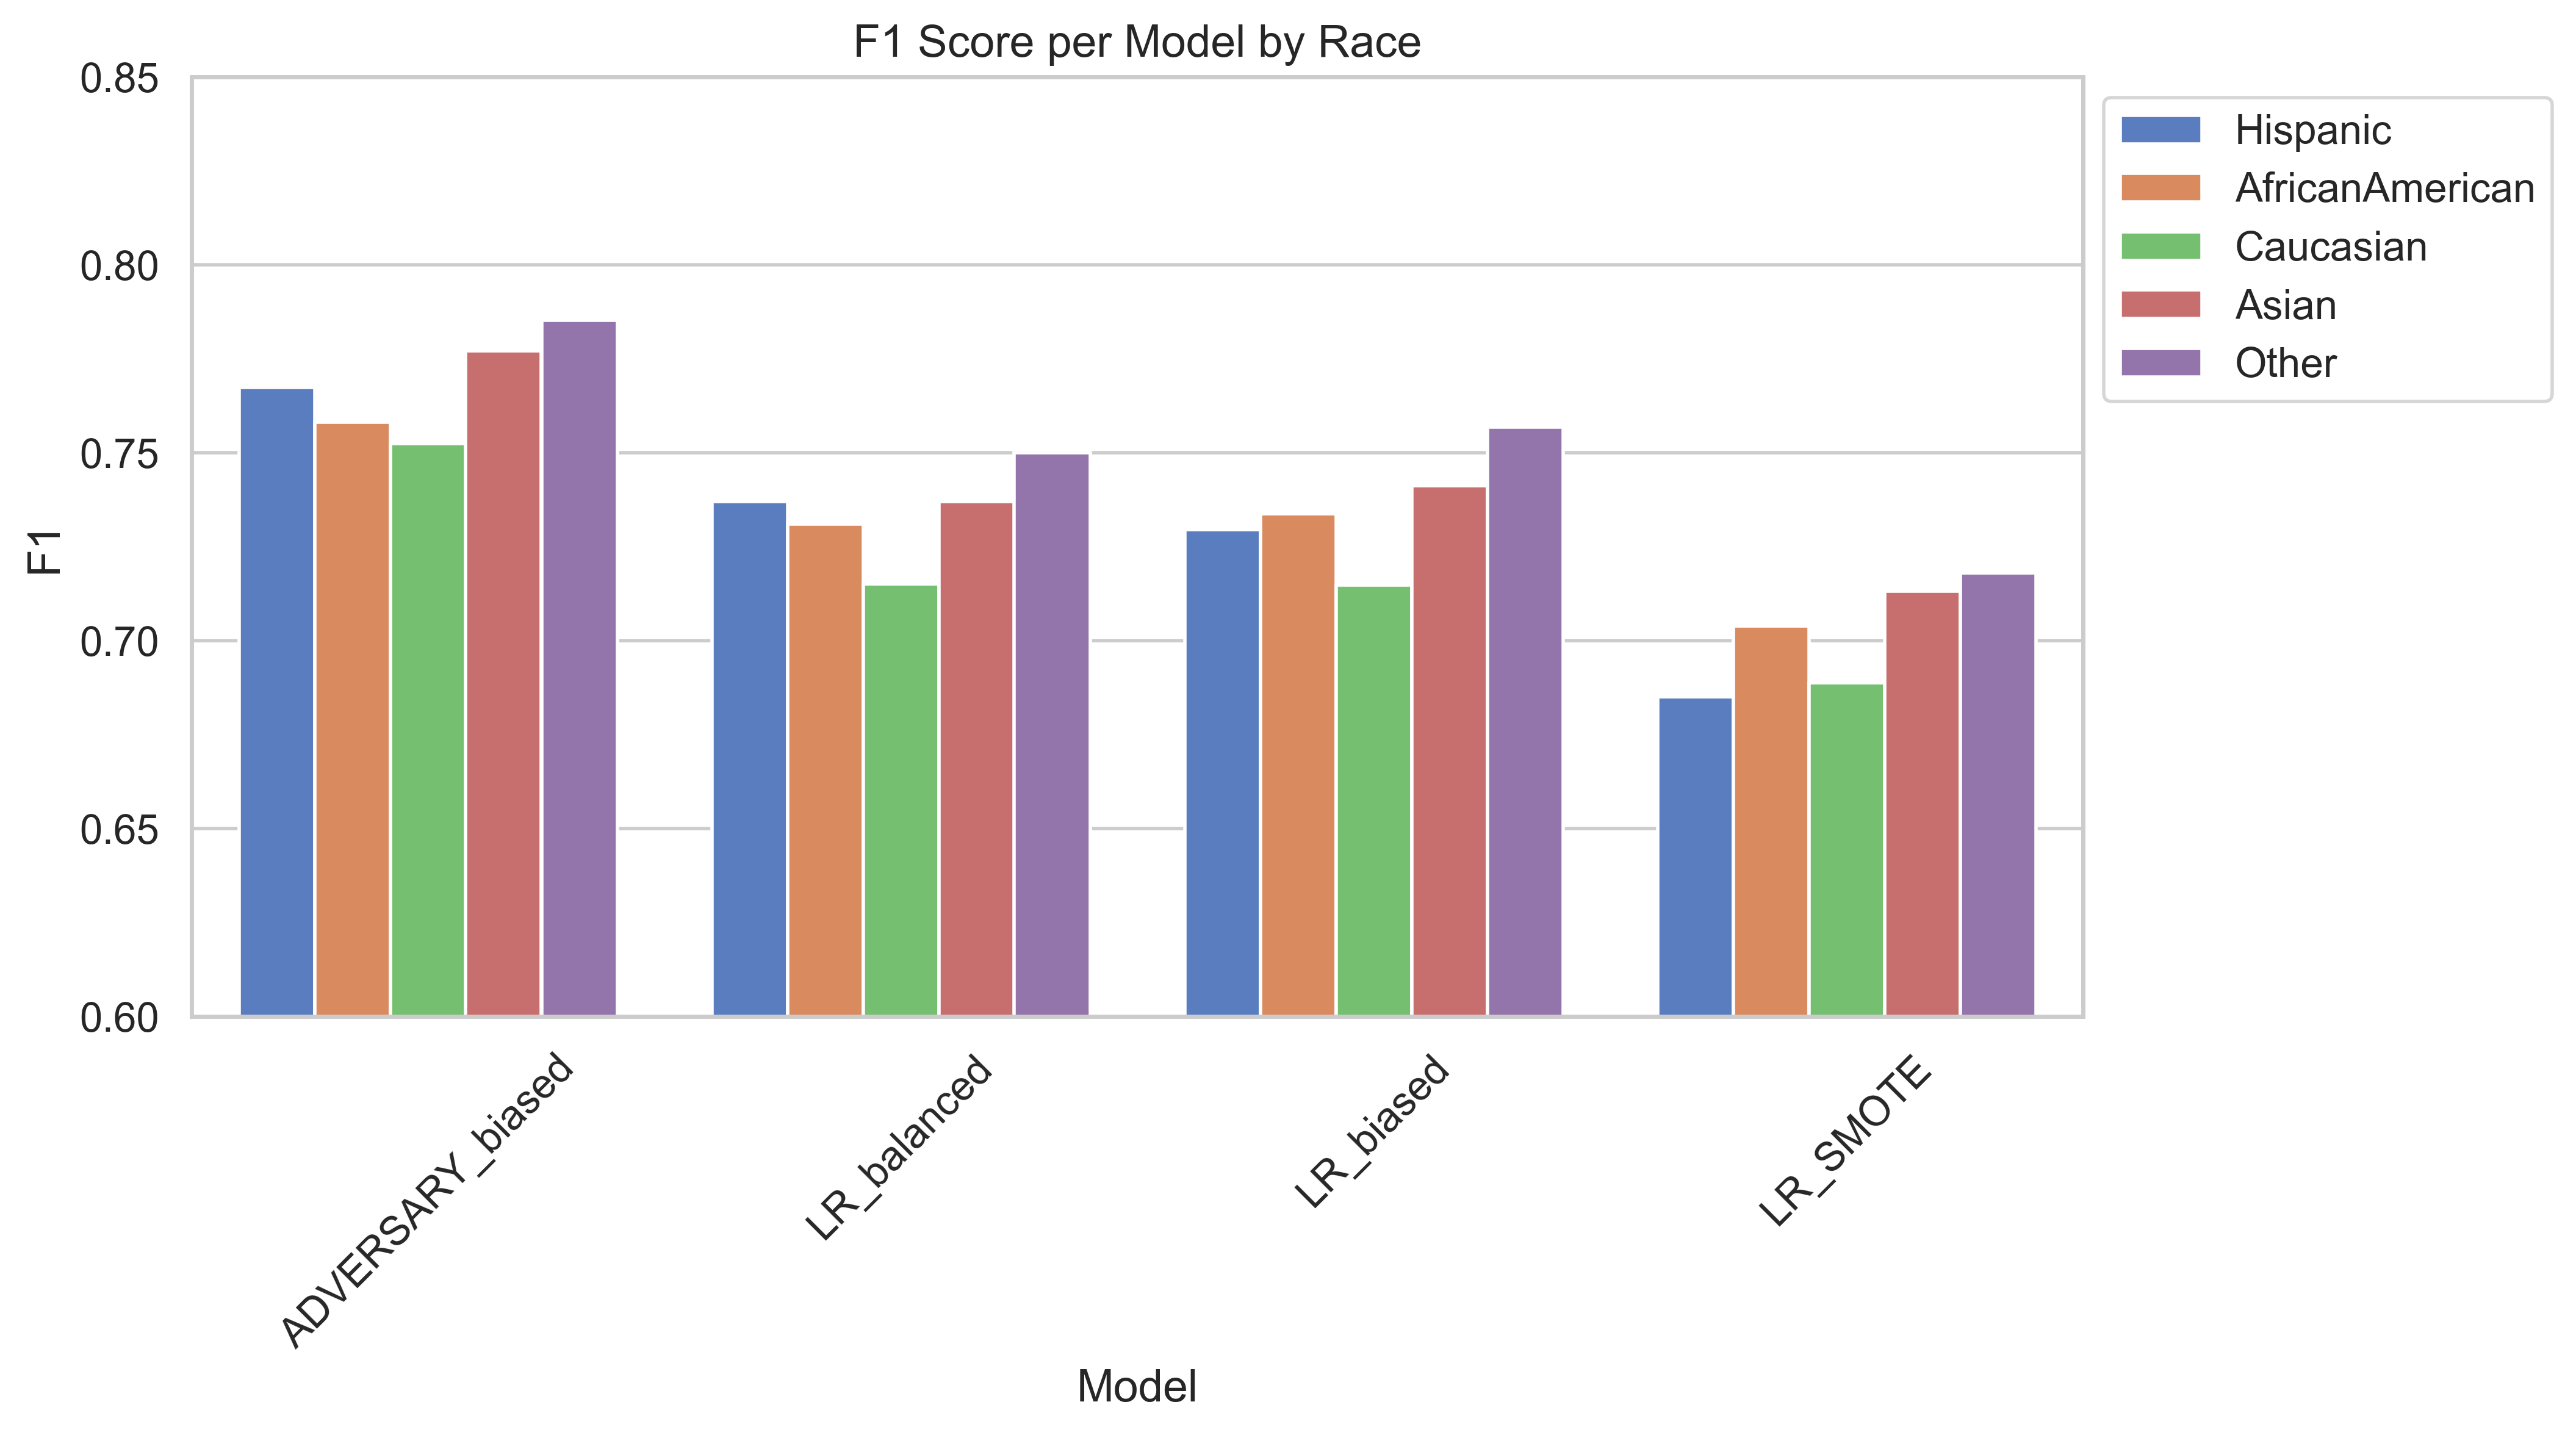

In [15]:
# 1. F1 Scores
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="F1", hue="Race")
plt.title("F1 Score per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.6,0.85)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

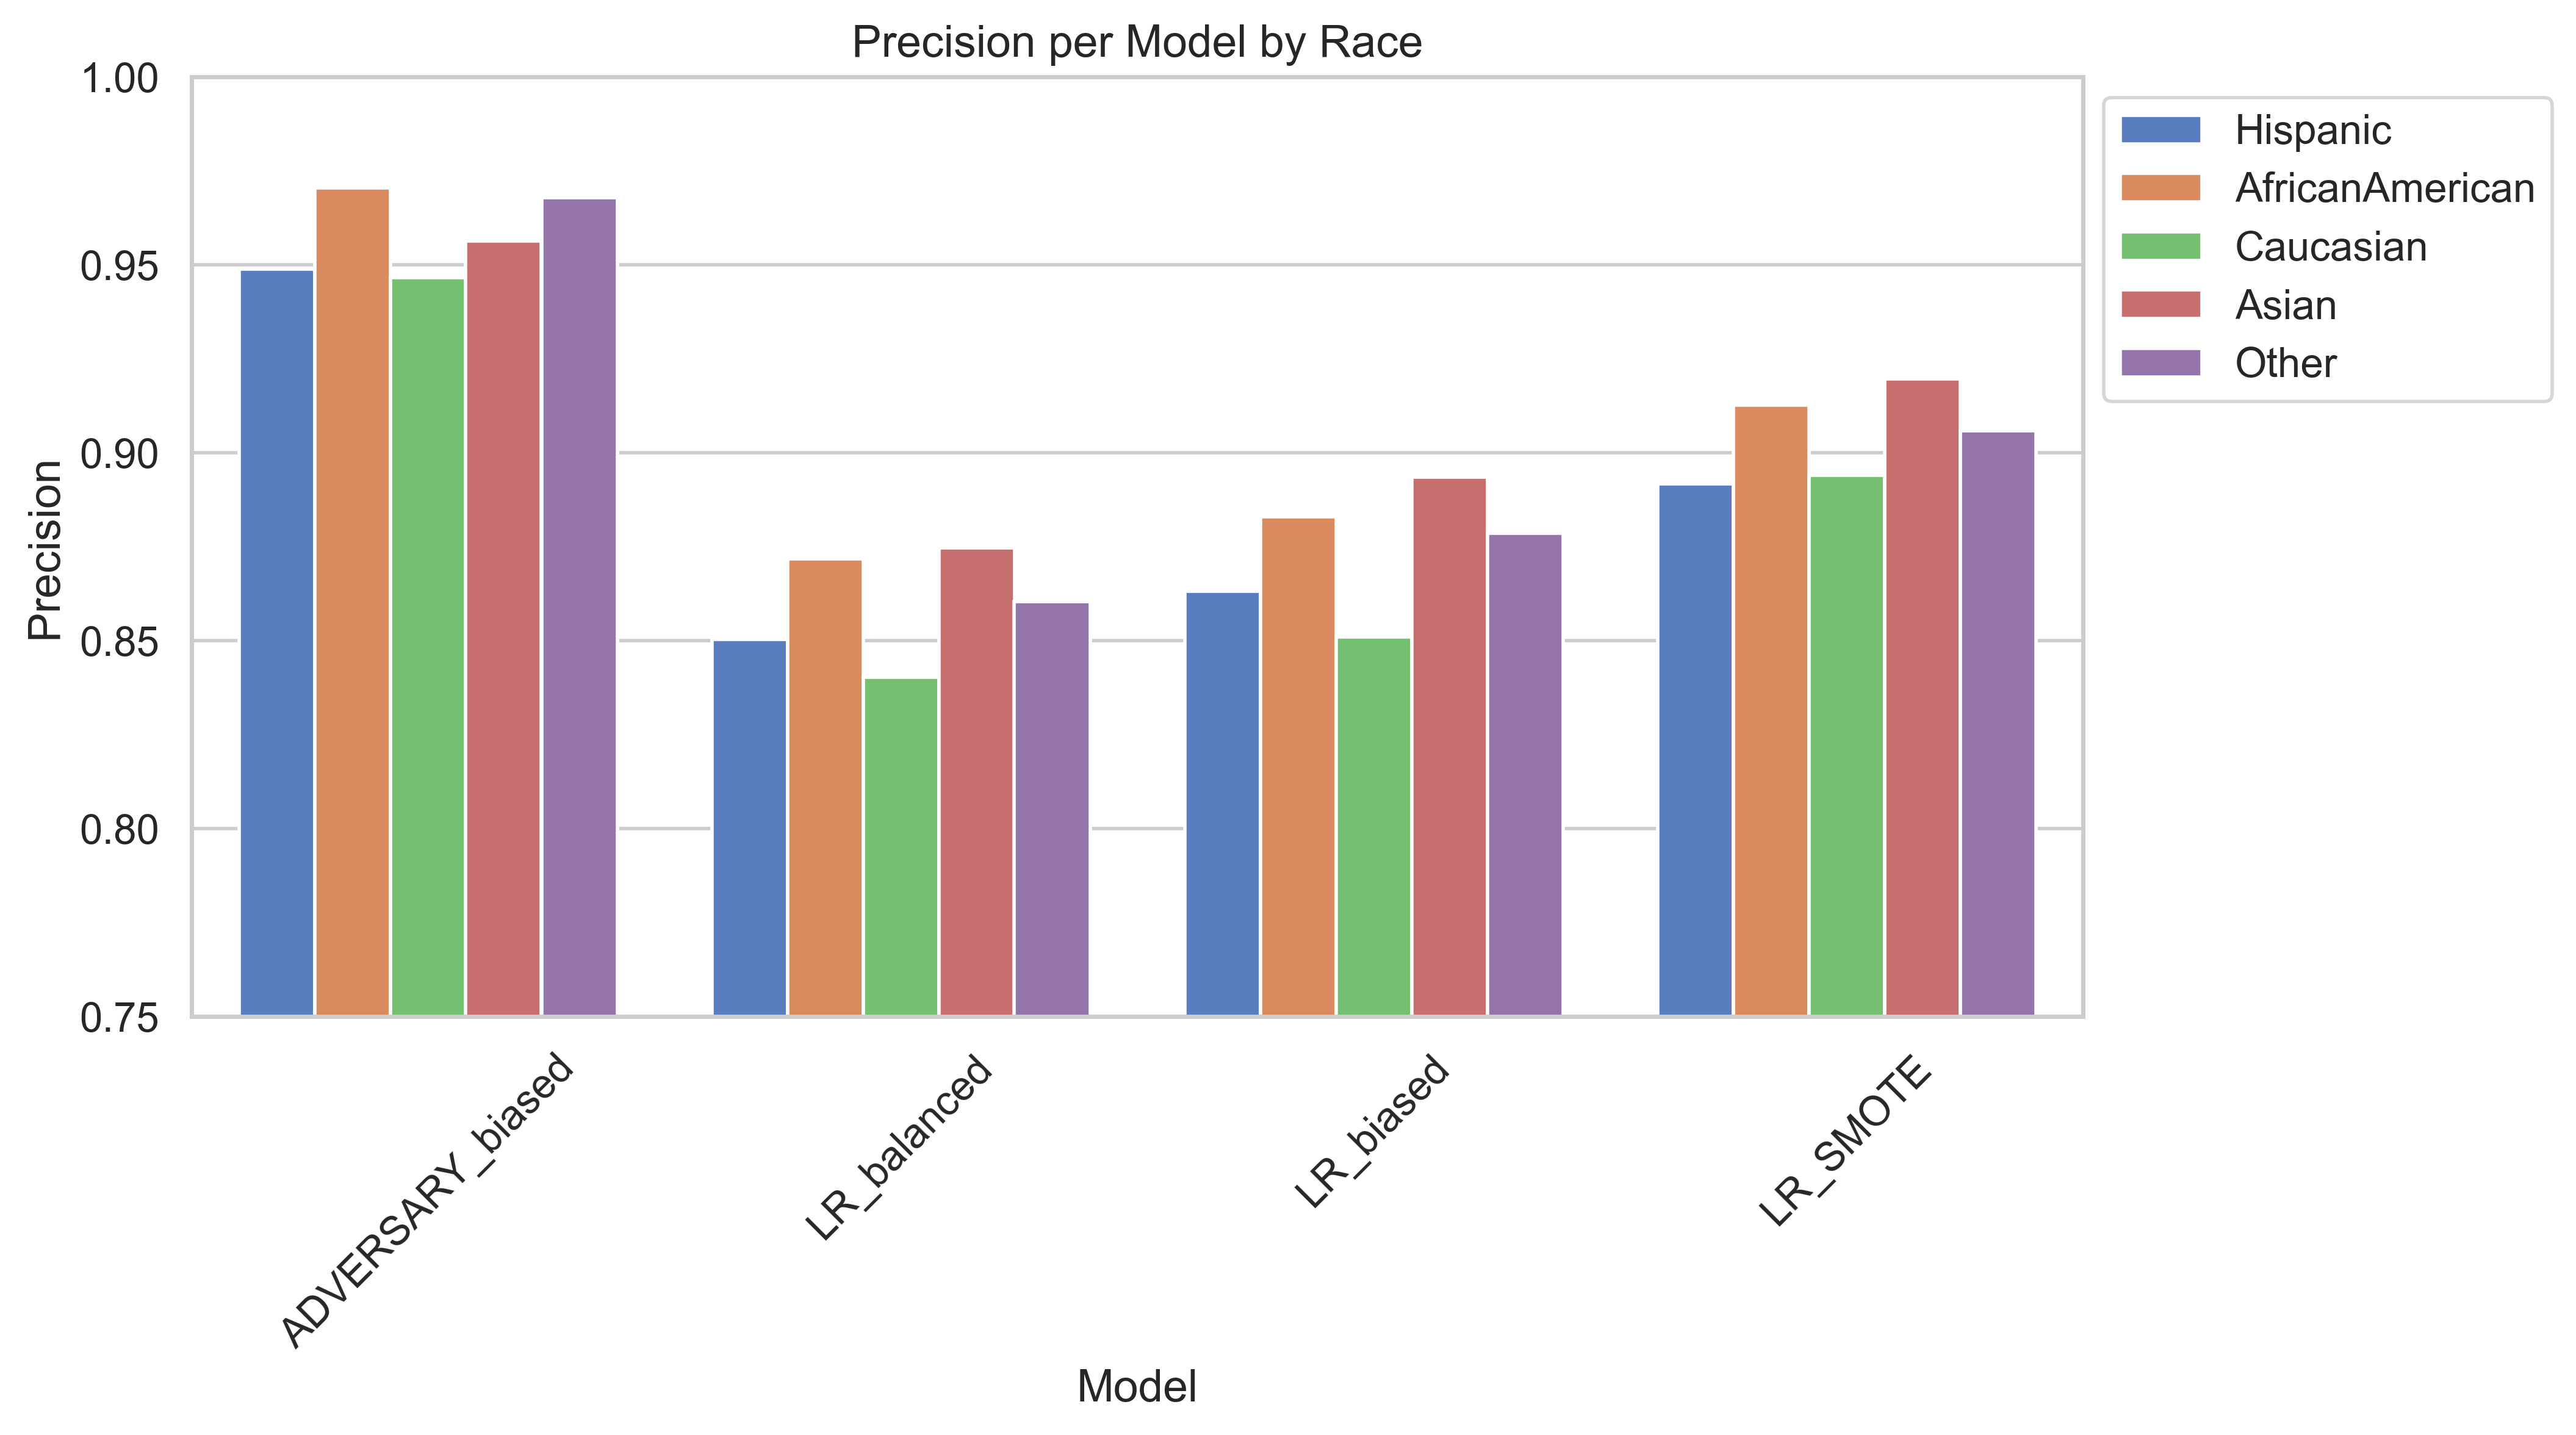

In [16]:
# 2. Precision
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="Precision", hue="Race")
plt.title("Precision per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.75, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

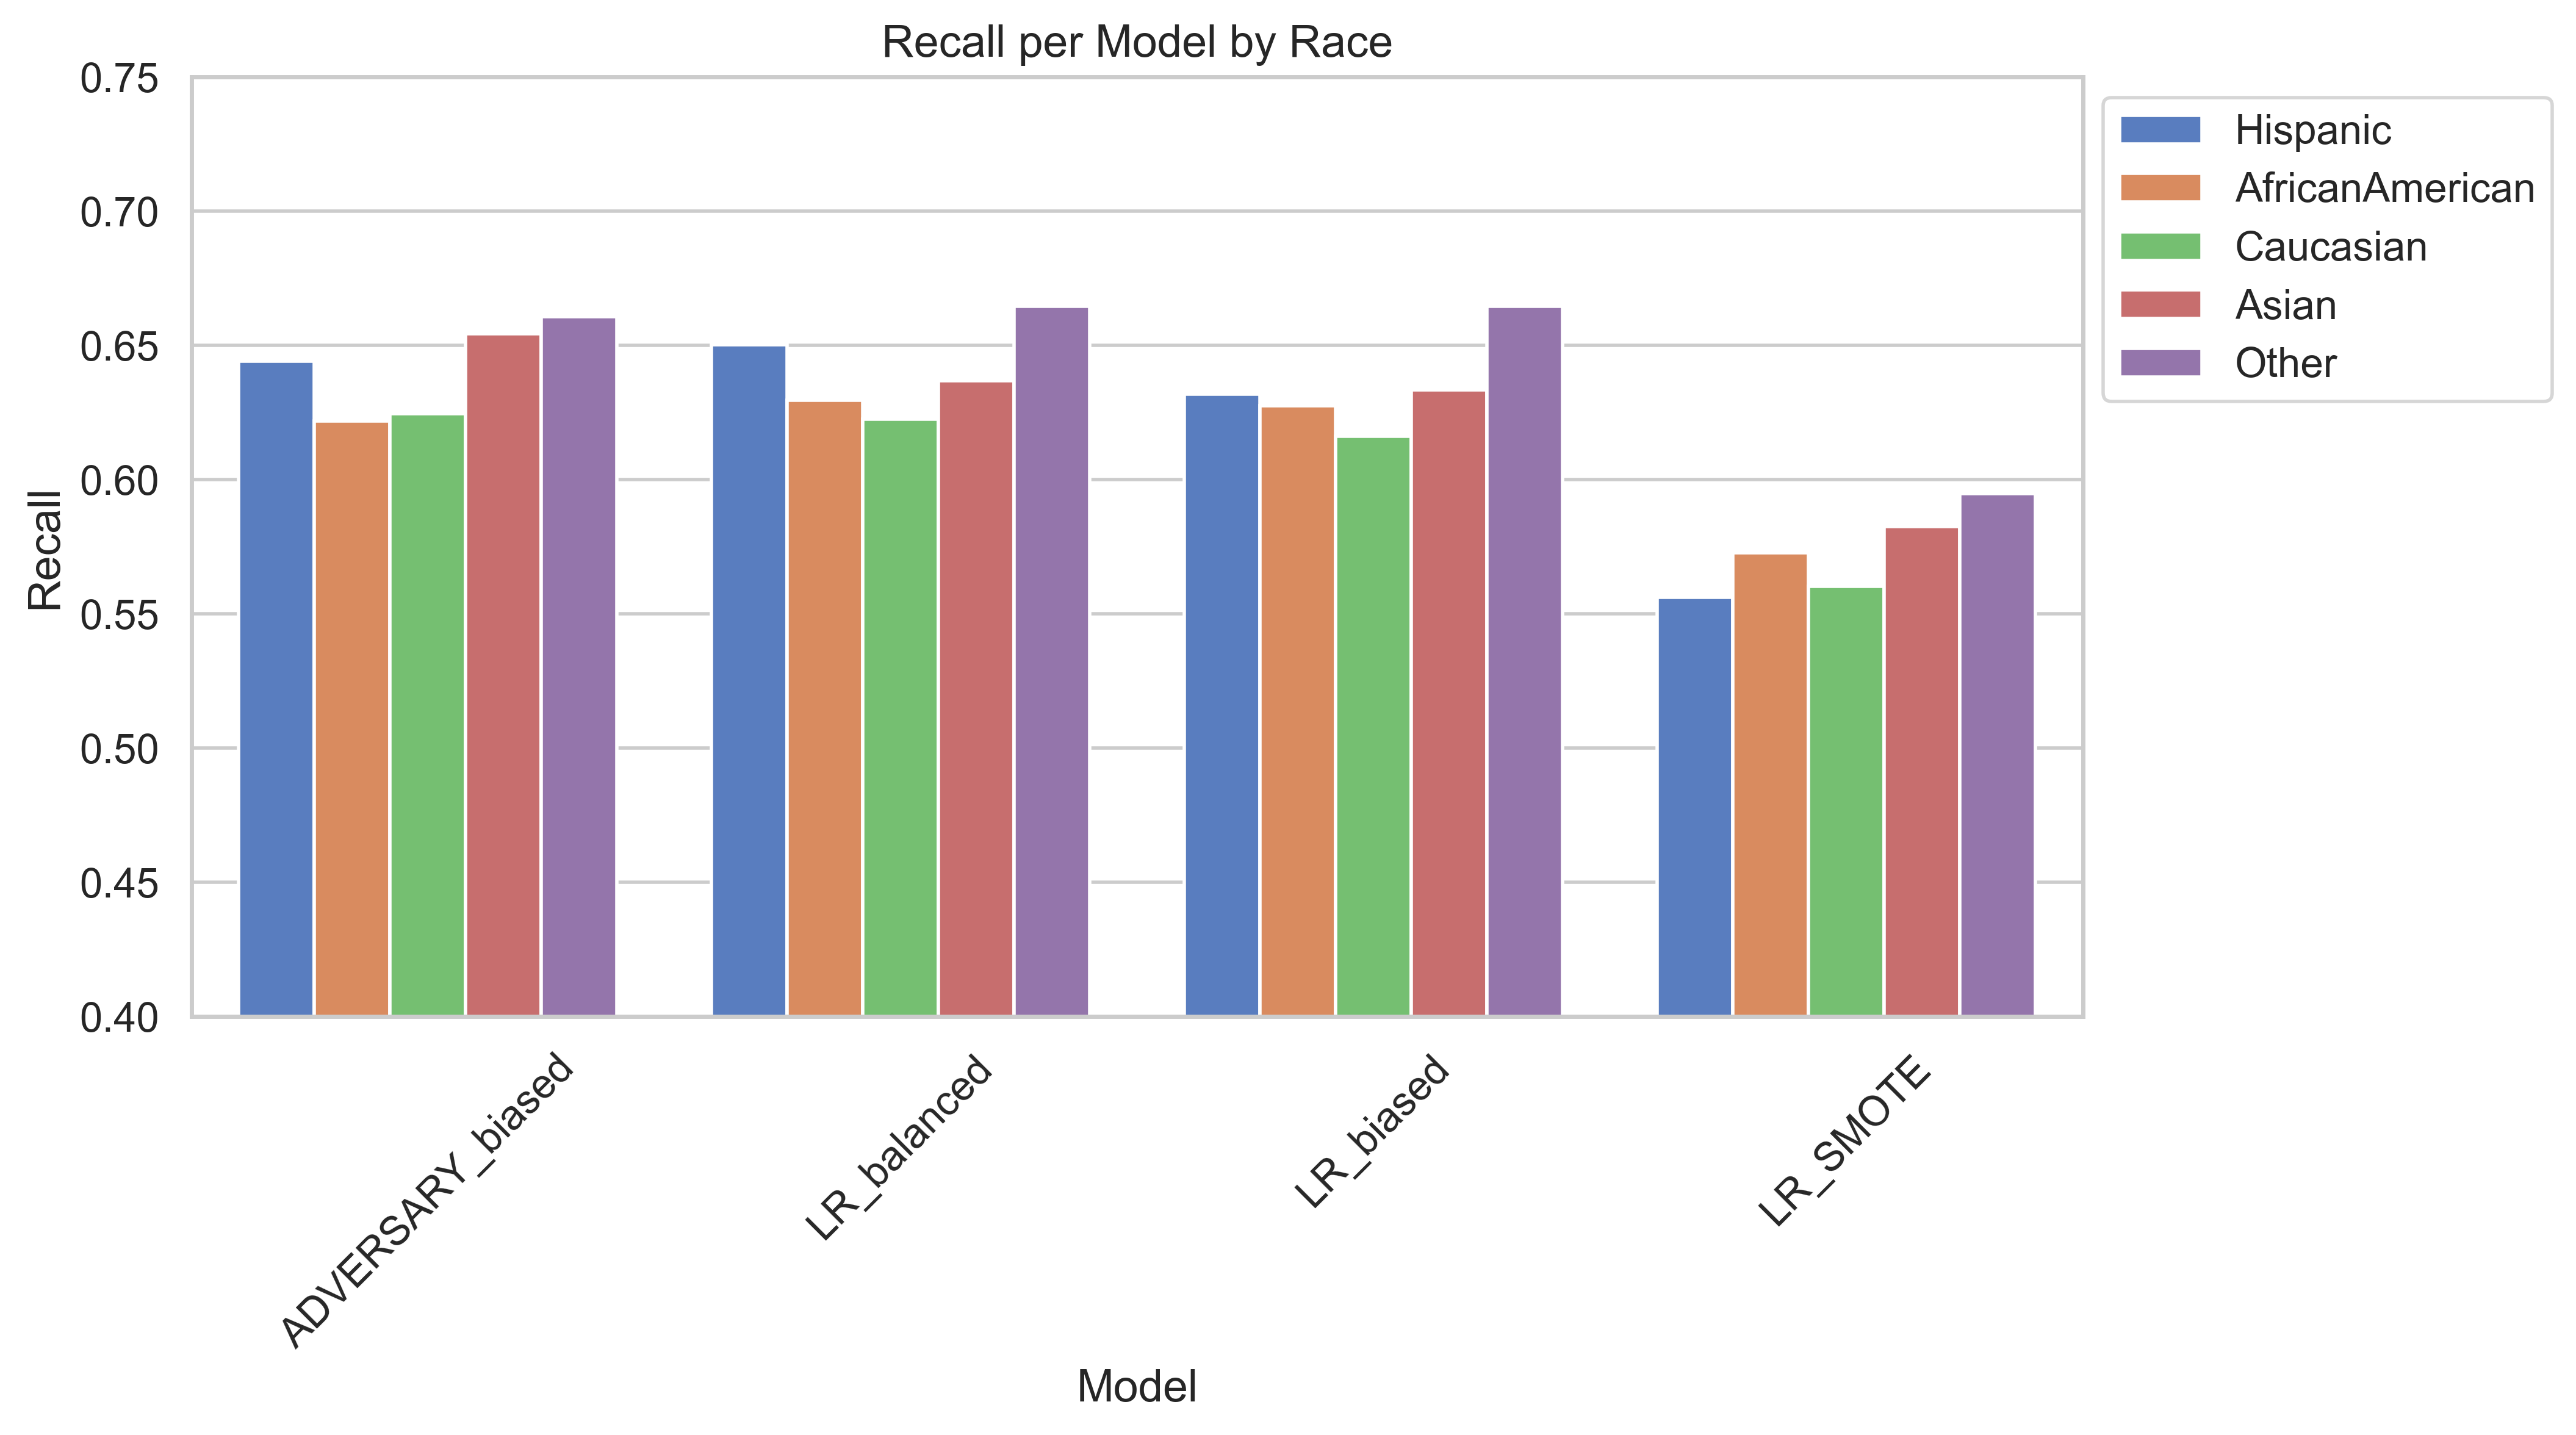

In [17]:
# 3. Recall
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="Recall", hue="Race")
plt.title("Recall per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.4,0.75)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

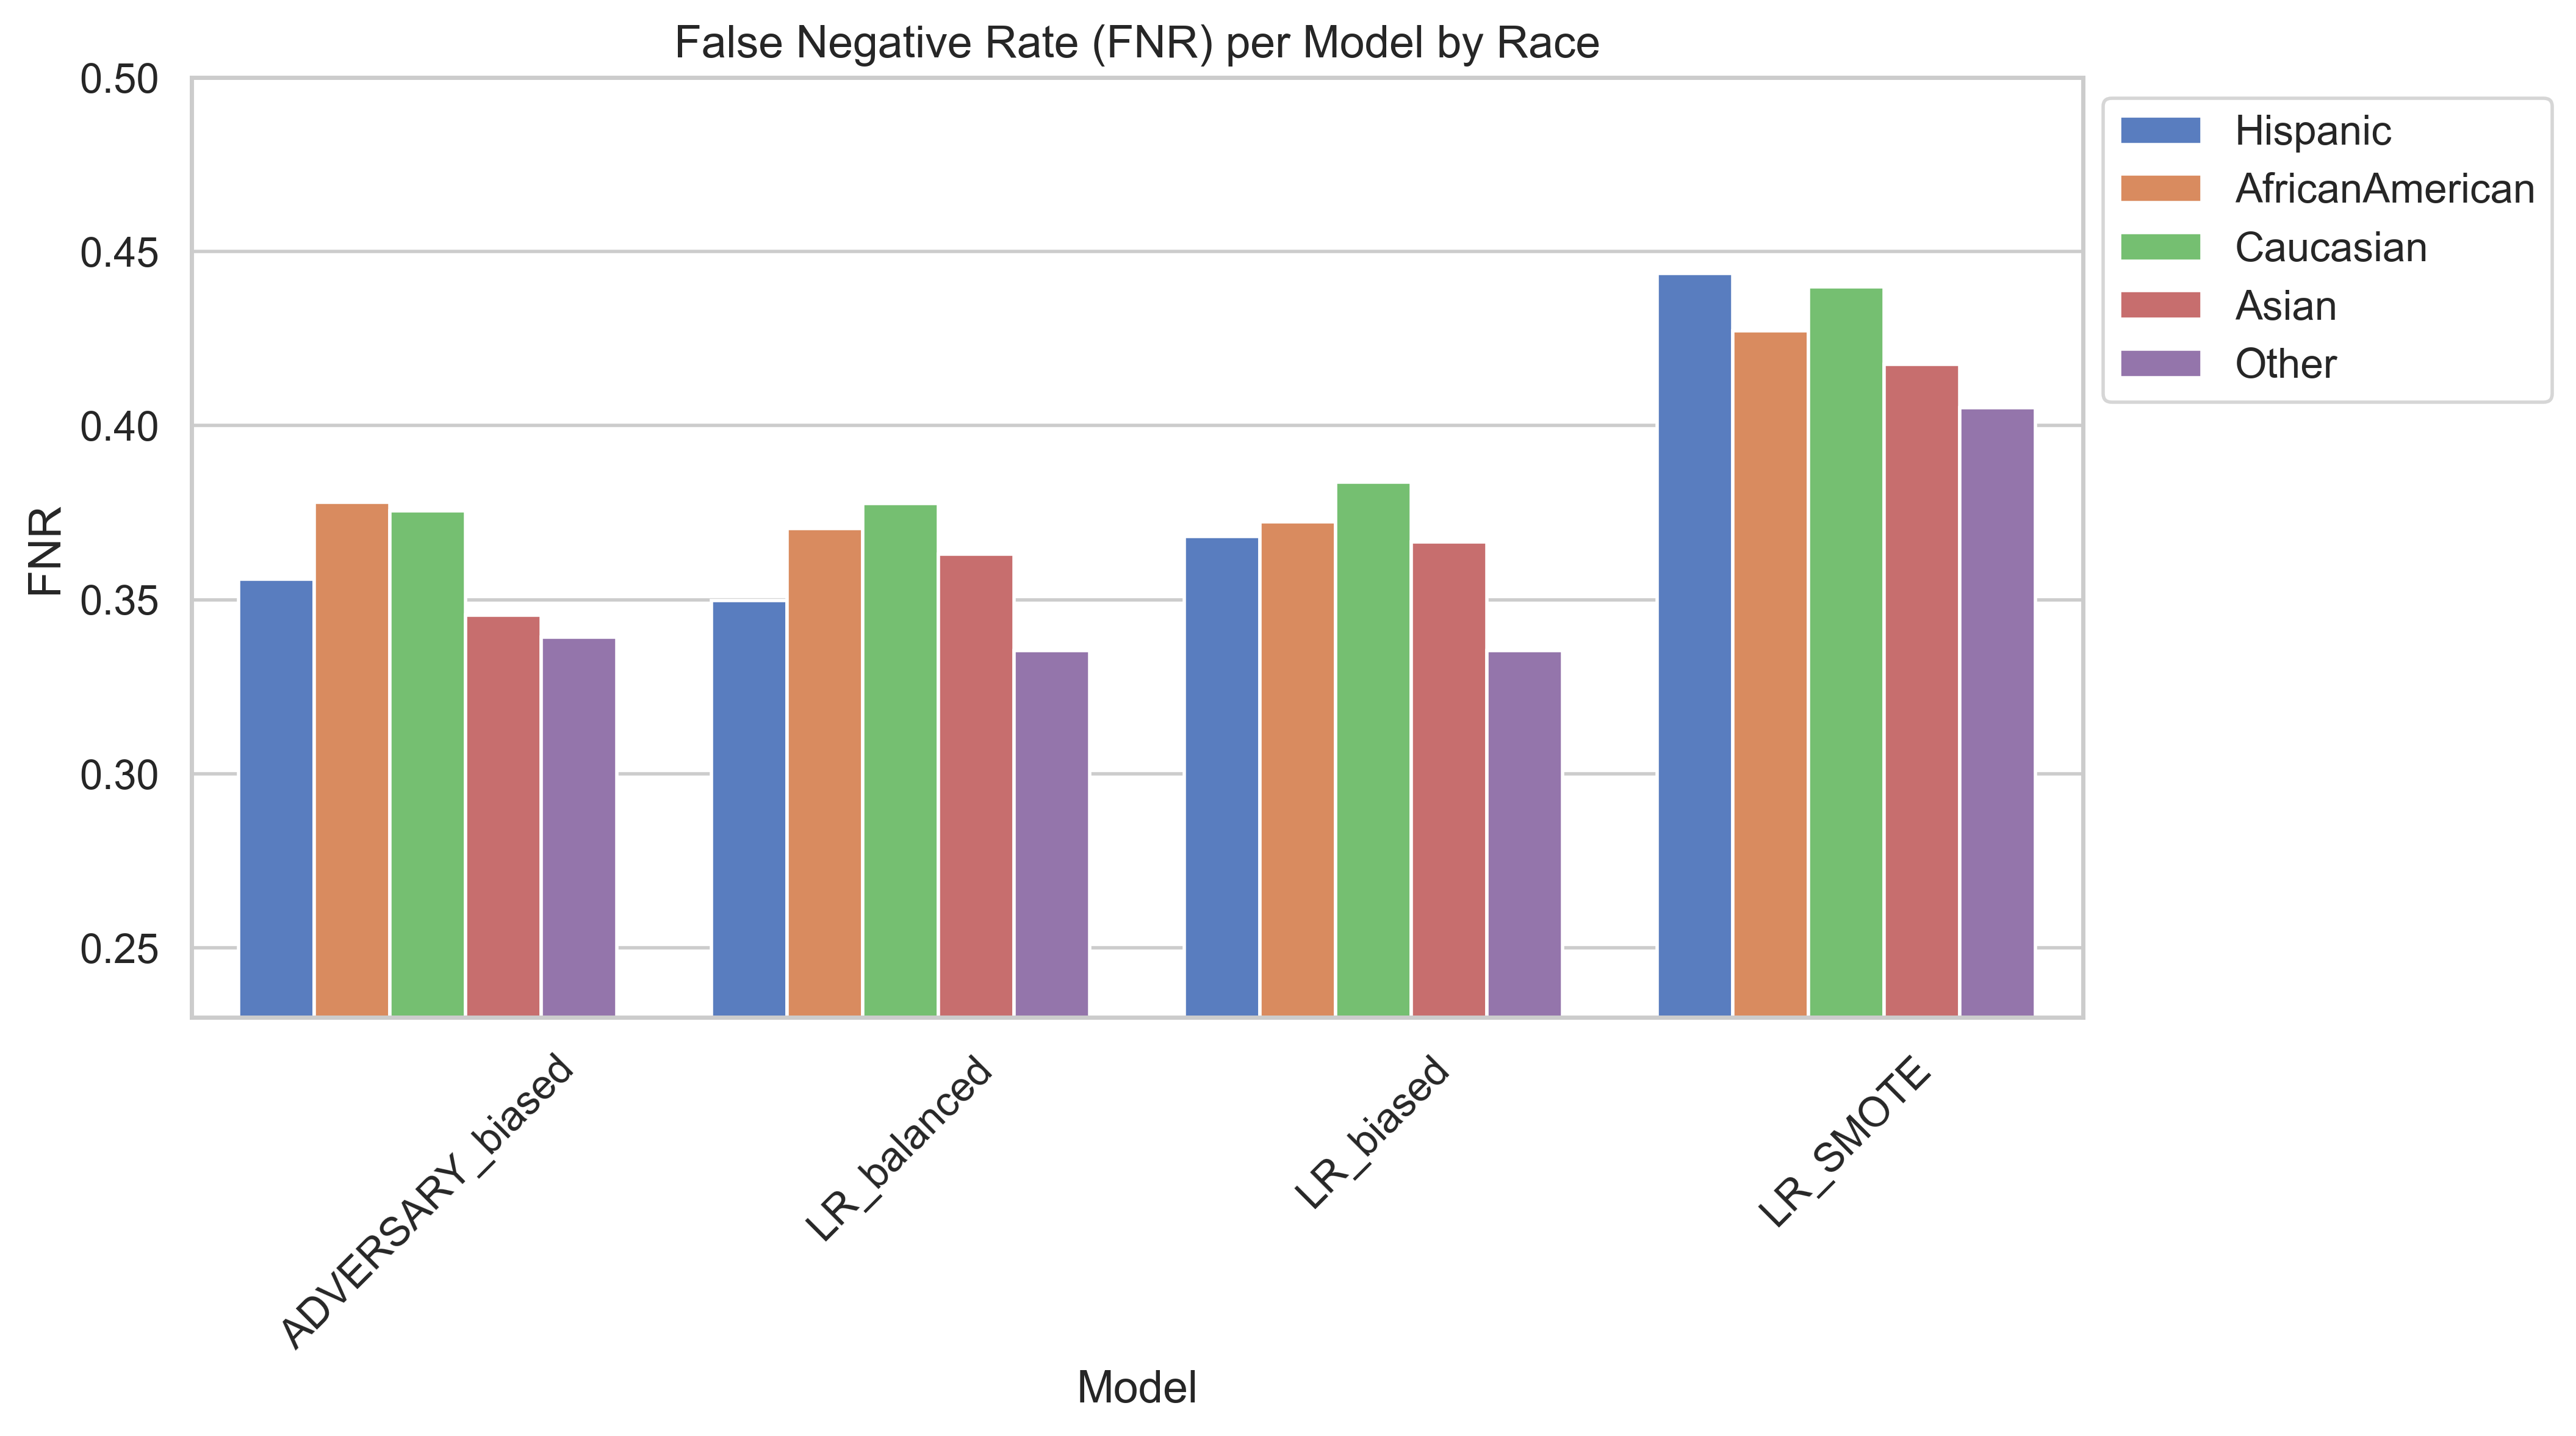

In [18]:
# 4. FNR Parity
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="FNR", hue="Race")
plt.title("False Negative Rate (FNR) per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.23,0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

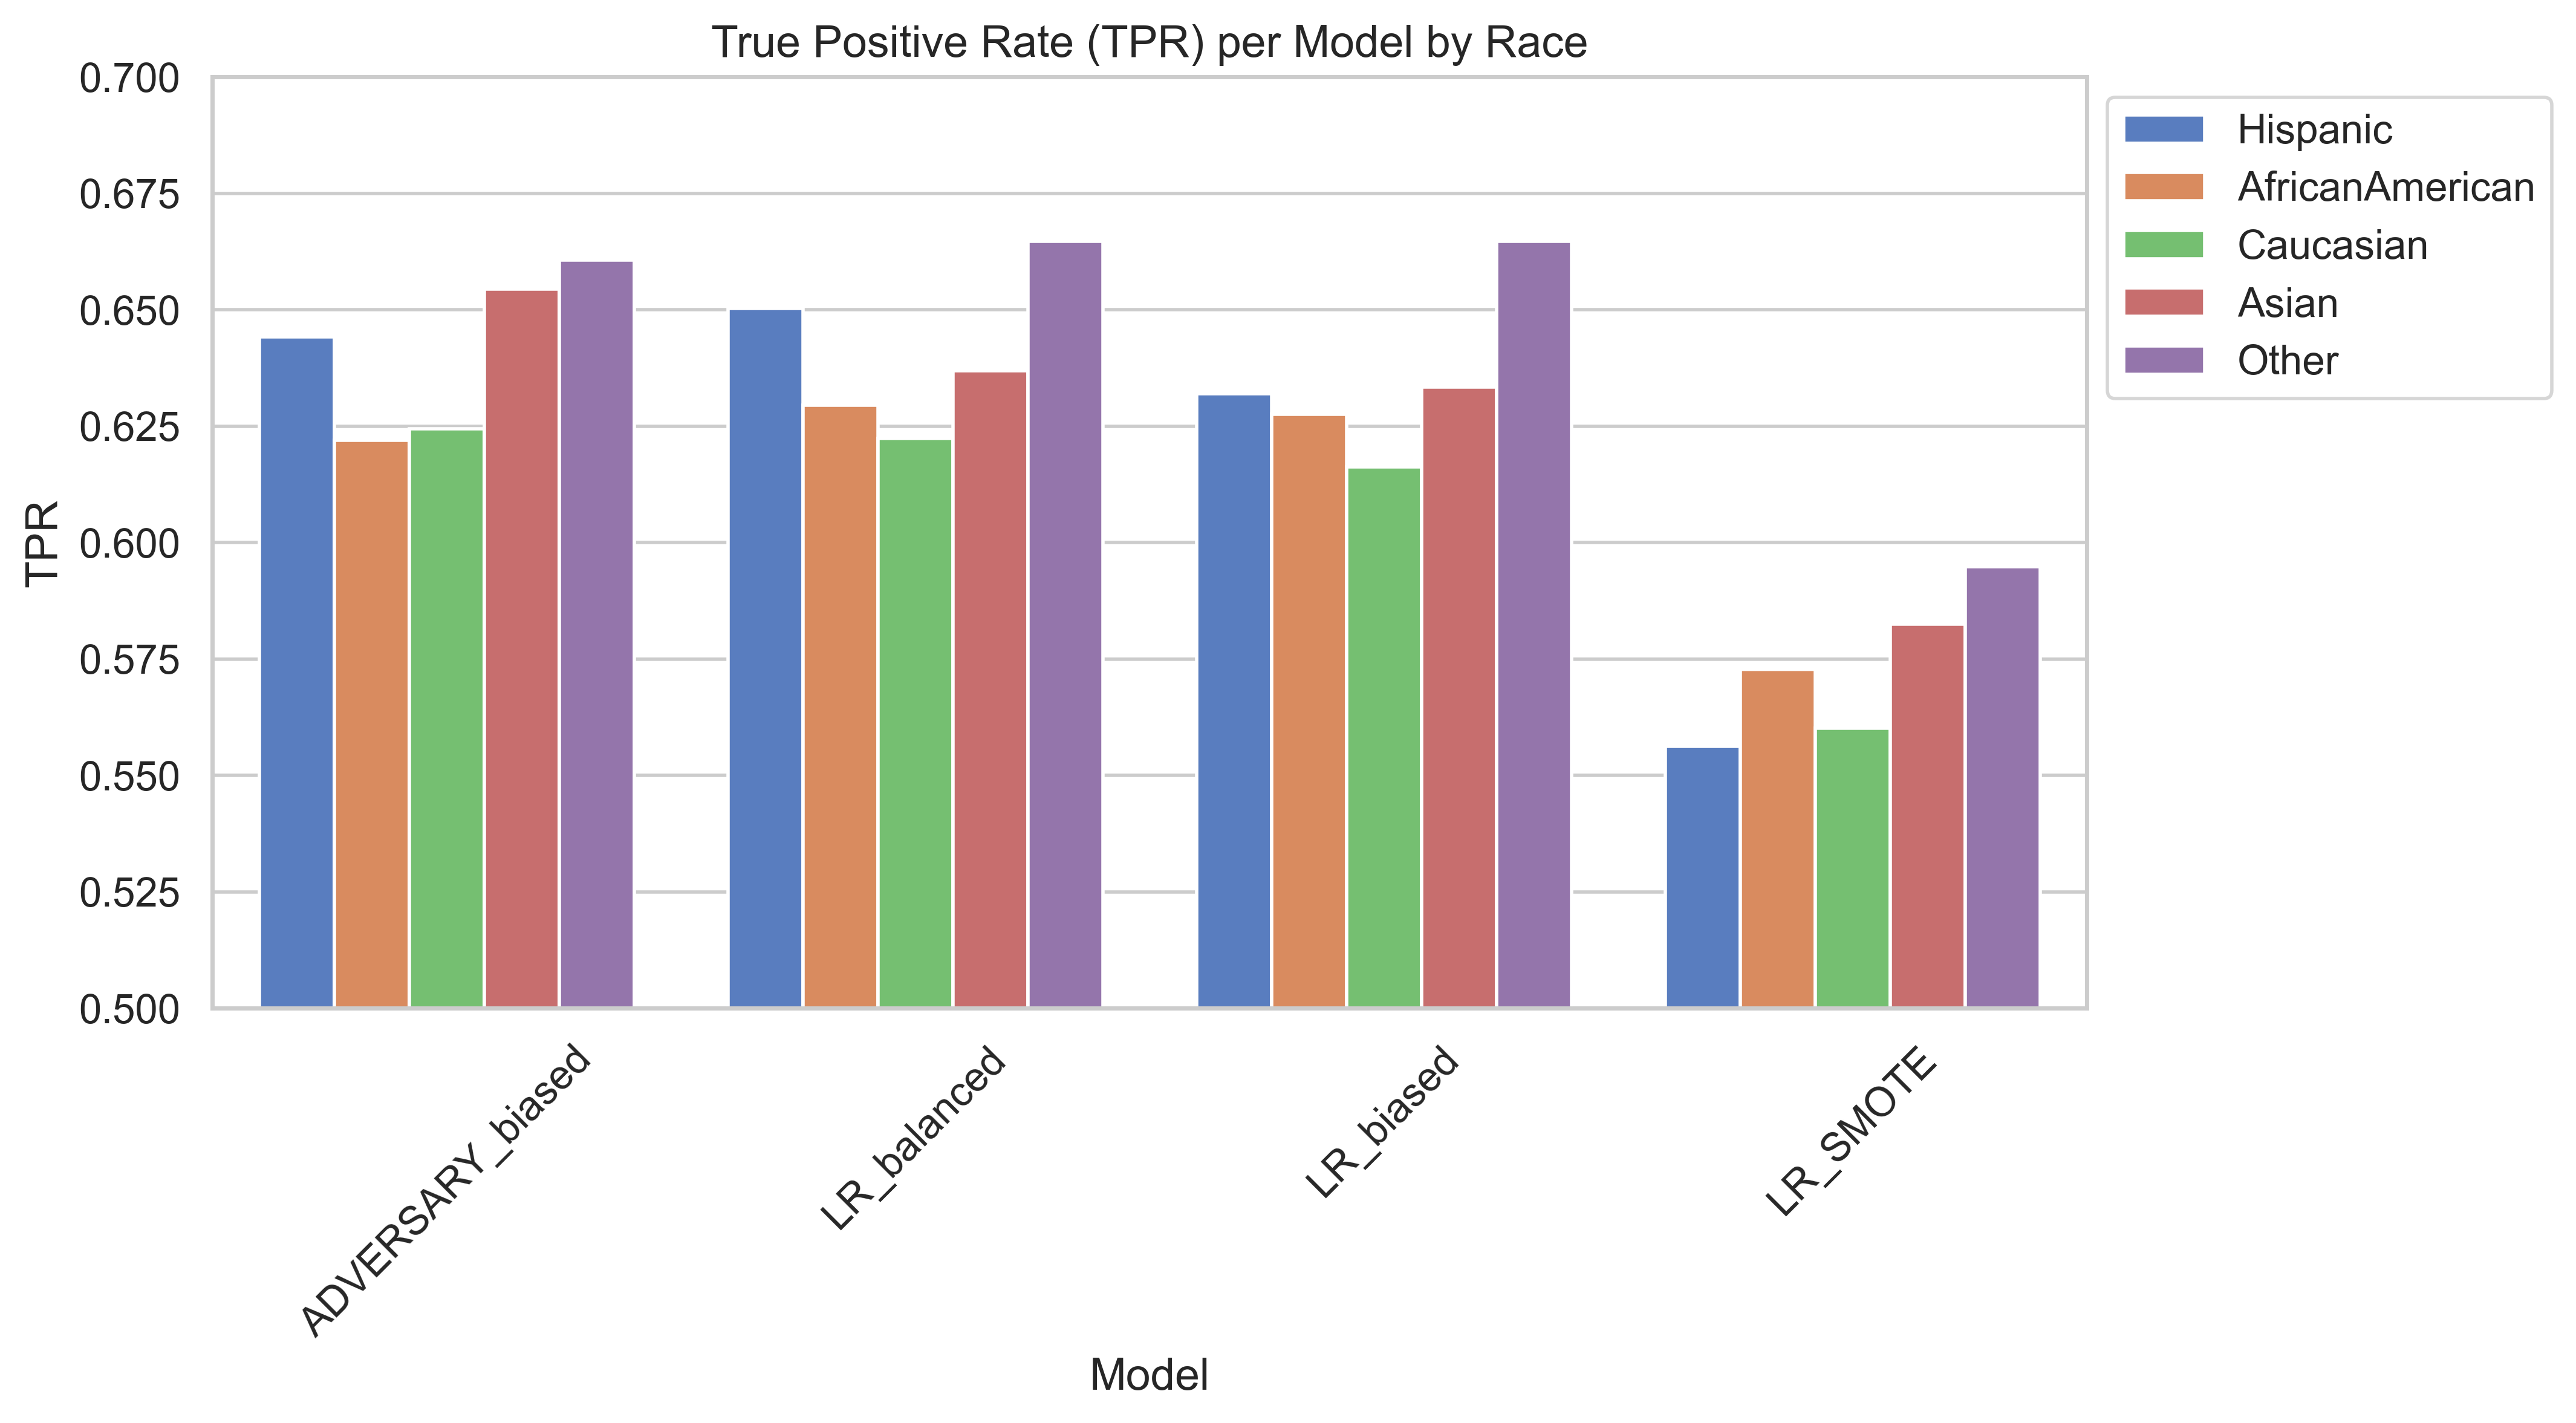

In [19]:
# 4. FNR Parity
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="TPR", hue="Race")
plt.title("True Positive Rate (TPR) per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.5,0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

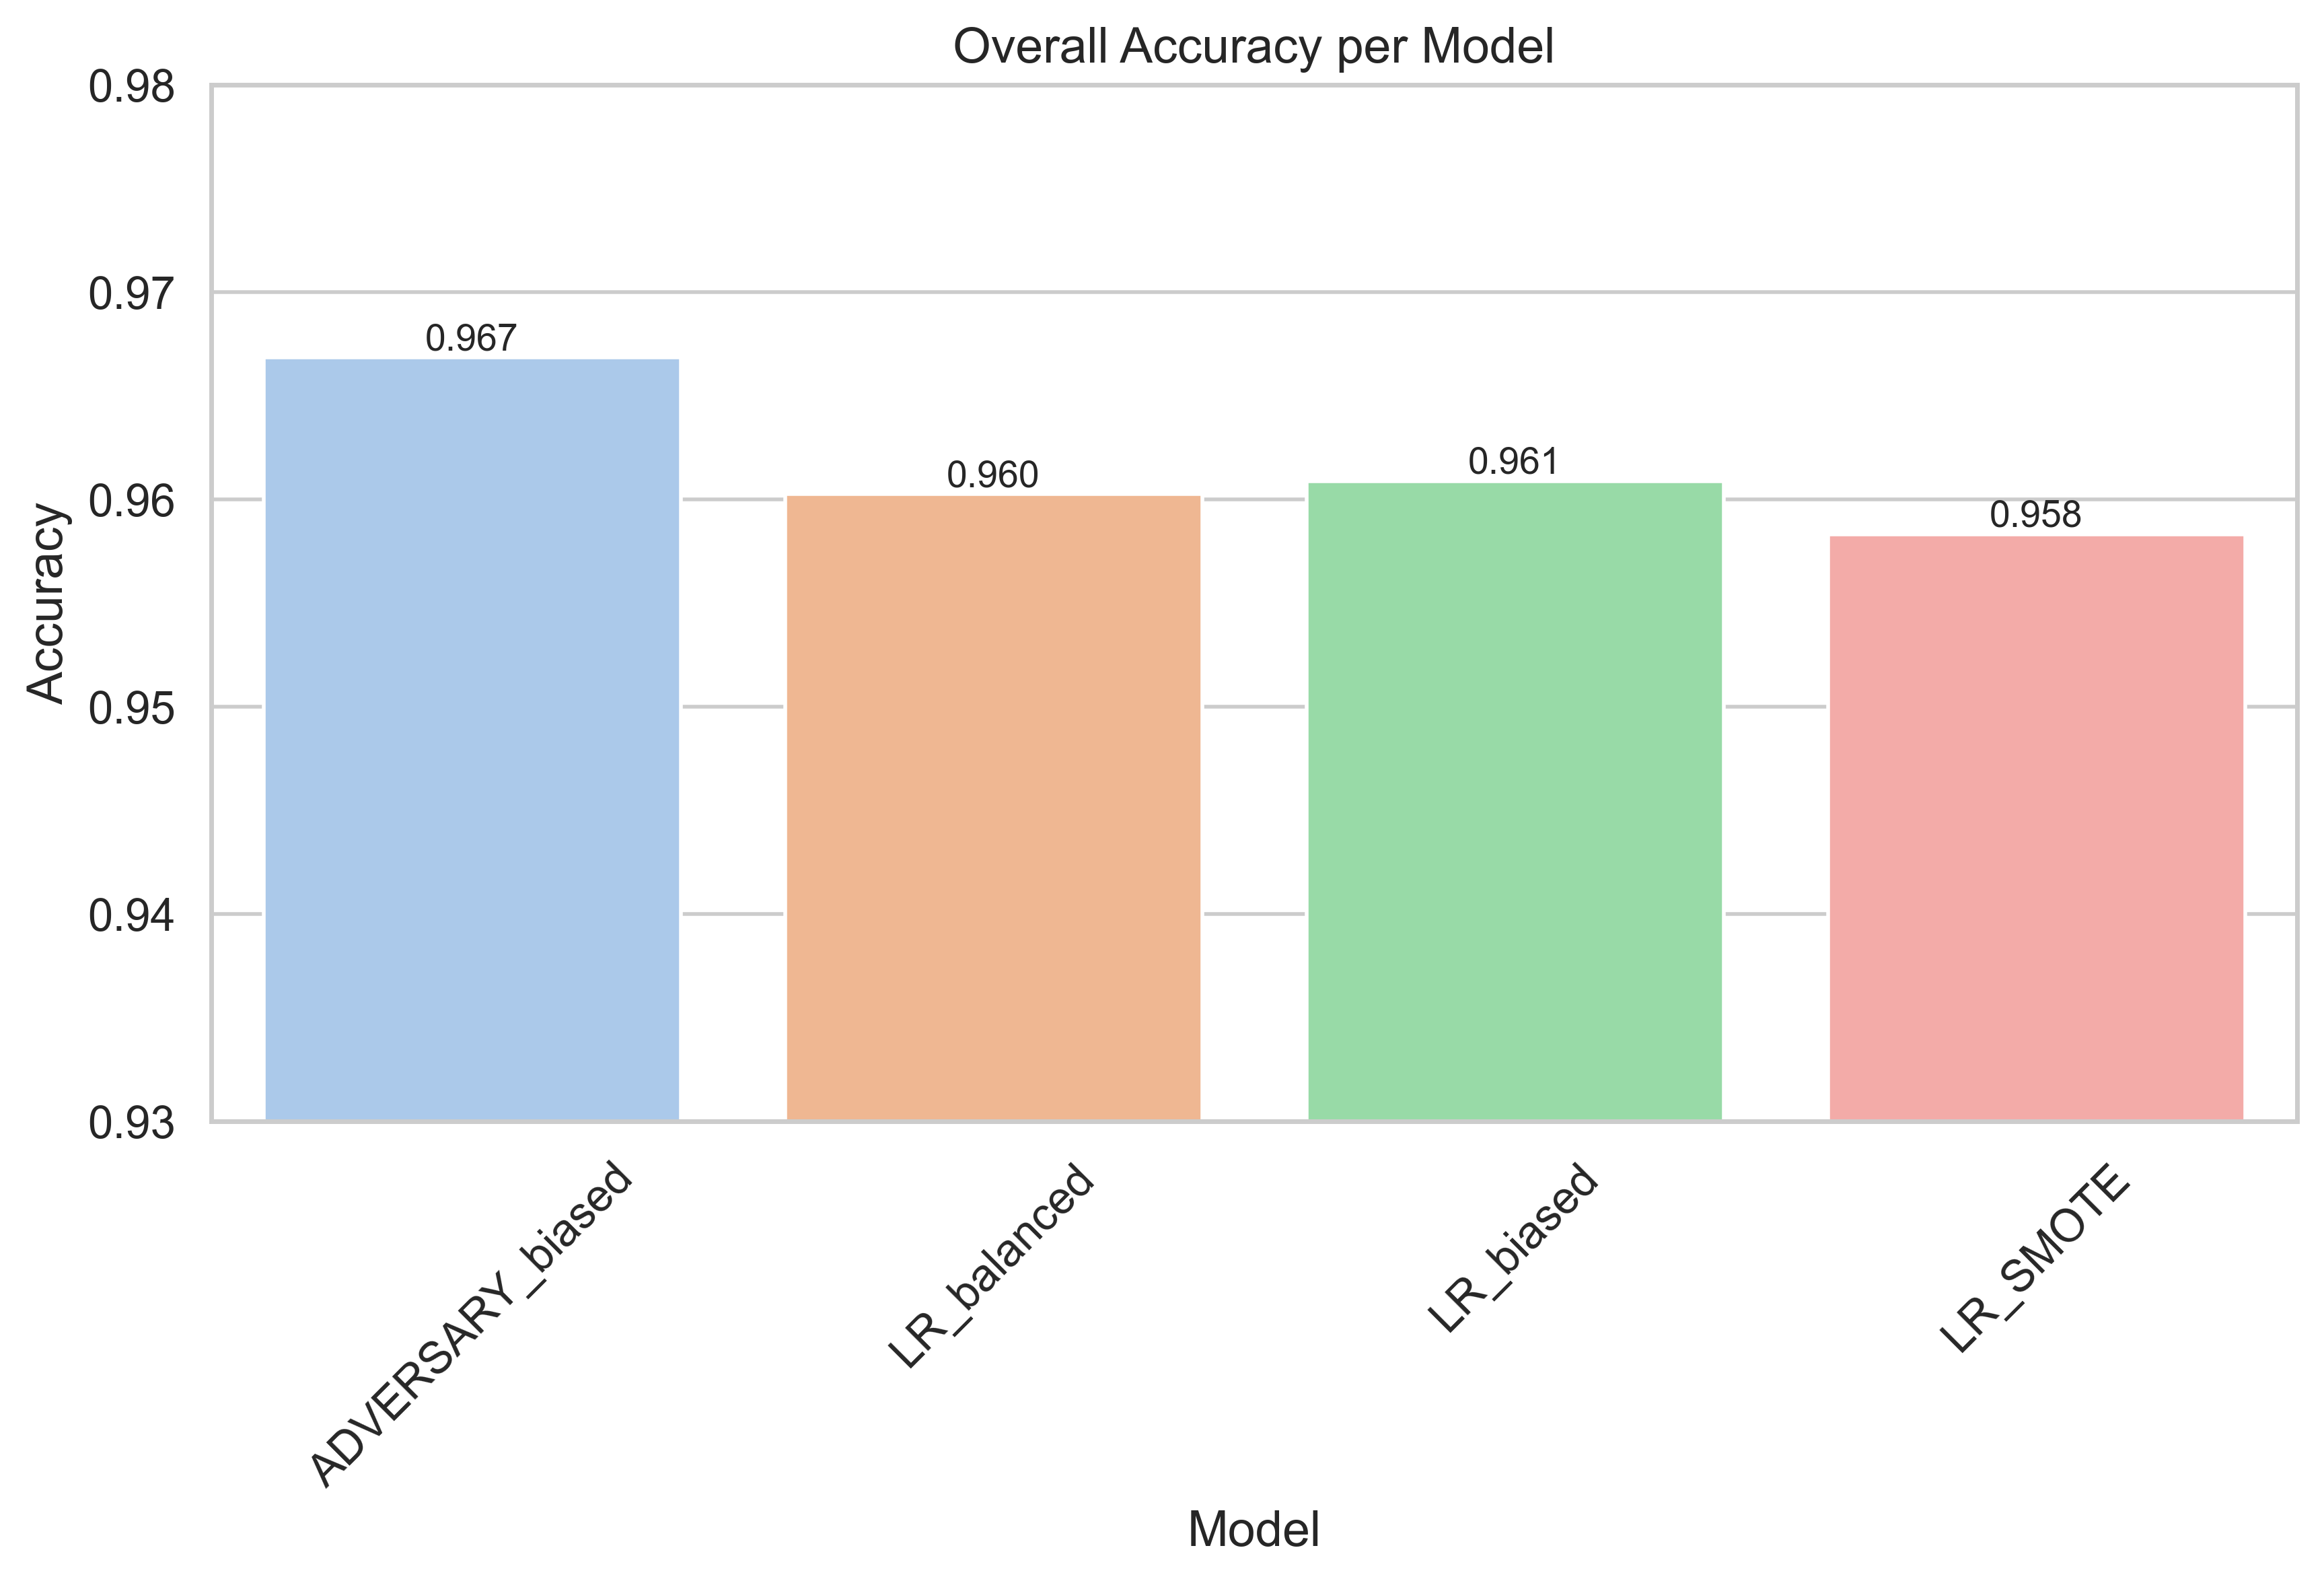

In [21]:
accuracy_list = [] 
for model_name, path in files.items(): 
    df = pd.read_csv(path) 
    y_true = df['True_Label'] 
    y_pred = df['Predicted_Label'] 
    acc = (y_true == y_pred).mean() 
    accuracy_list.append({"Model": model_name, "Accuracy": acc})     
accuracy_df = pd.DataFrame(accuracy_list)

plt.figure(figsize=(10,5), dpi=400)
ax = sns.barplot(data=accuracy_df, x="Model", y="Accuracy", palette="pastel")
plt.title("Overall Accuracy per Model")
plt.xticks(rotation=45)
plt.ylim(0.93, 0.98)

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.3f}",  # format with 3 decimals
                (p.get_x() + p.get_width() / 2, height),  # x,y coords
                ha='center', va='bottom',  # align center, above bar
                fontsize=10)

# Legend (not strictly needed here since no hue)
plt.legend().remove()  # remove if not needed
plt.show()


In [59]:
model_metrics = []

for model_name, path in files.items():
    df = pd.read_csv(path)

    y_true = df["True_Label"]
    y_pred = df["Predicted_Label"]

    model_metrics.append({
        "Model": model_name,
        "F1": f1_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
    })

metrics_df = pd.DataFrame(model_metrics)

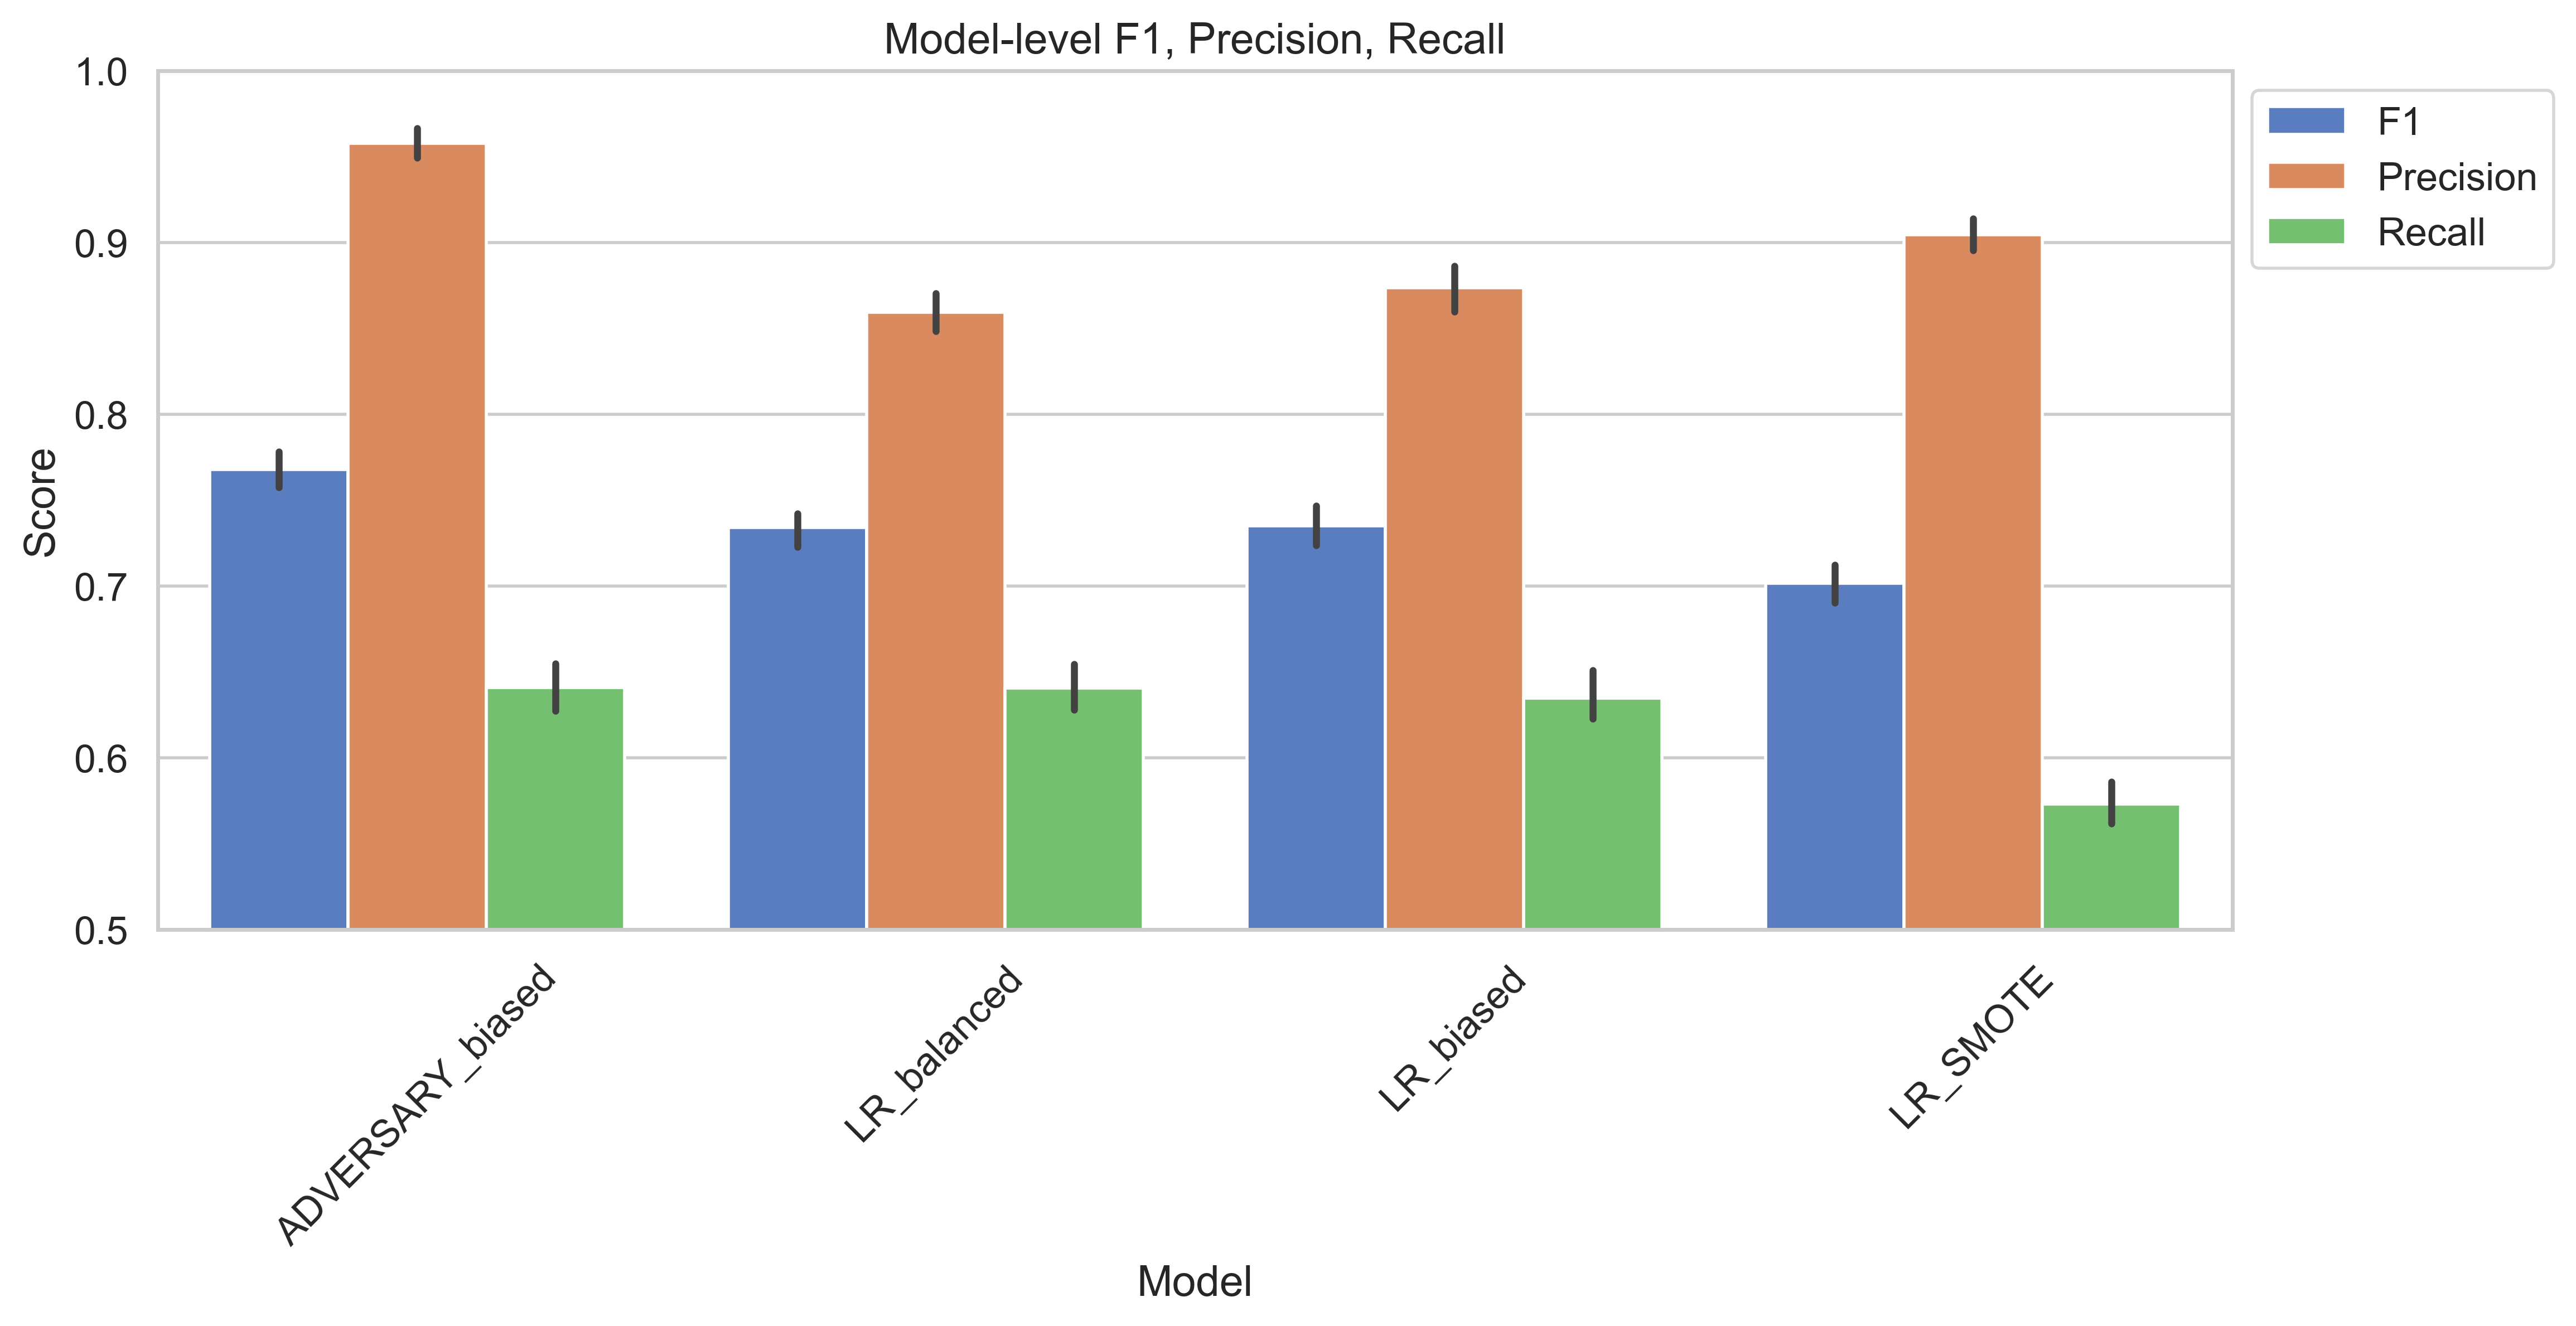

In [22]:
sns.set(style="whitegrid", palette="muted", font_scale=1.15)

plt.figure(figsize=(12,5),dpi=400)
sns.barplot(data=metrics_df.melt(id_vars="Model", value_vars=["F1","Precision","Recall"]),
            x="Model", y="value", hue="variable")
plt.title("Model-level F1, Precision, Recall")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.ylim(0.5,1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

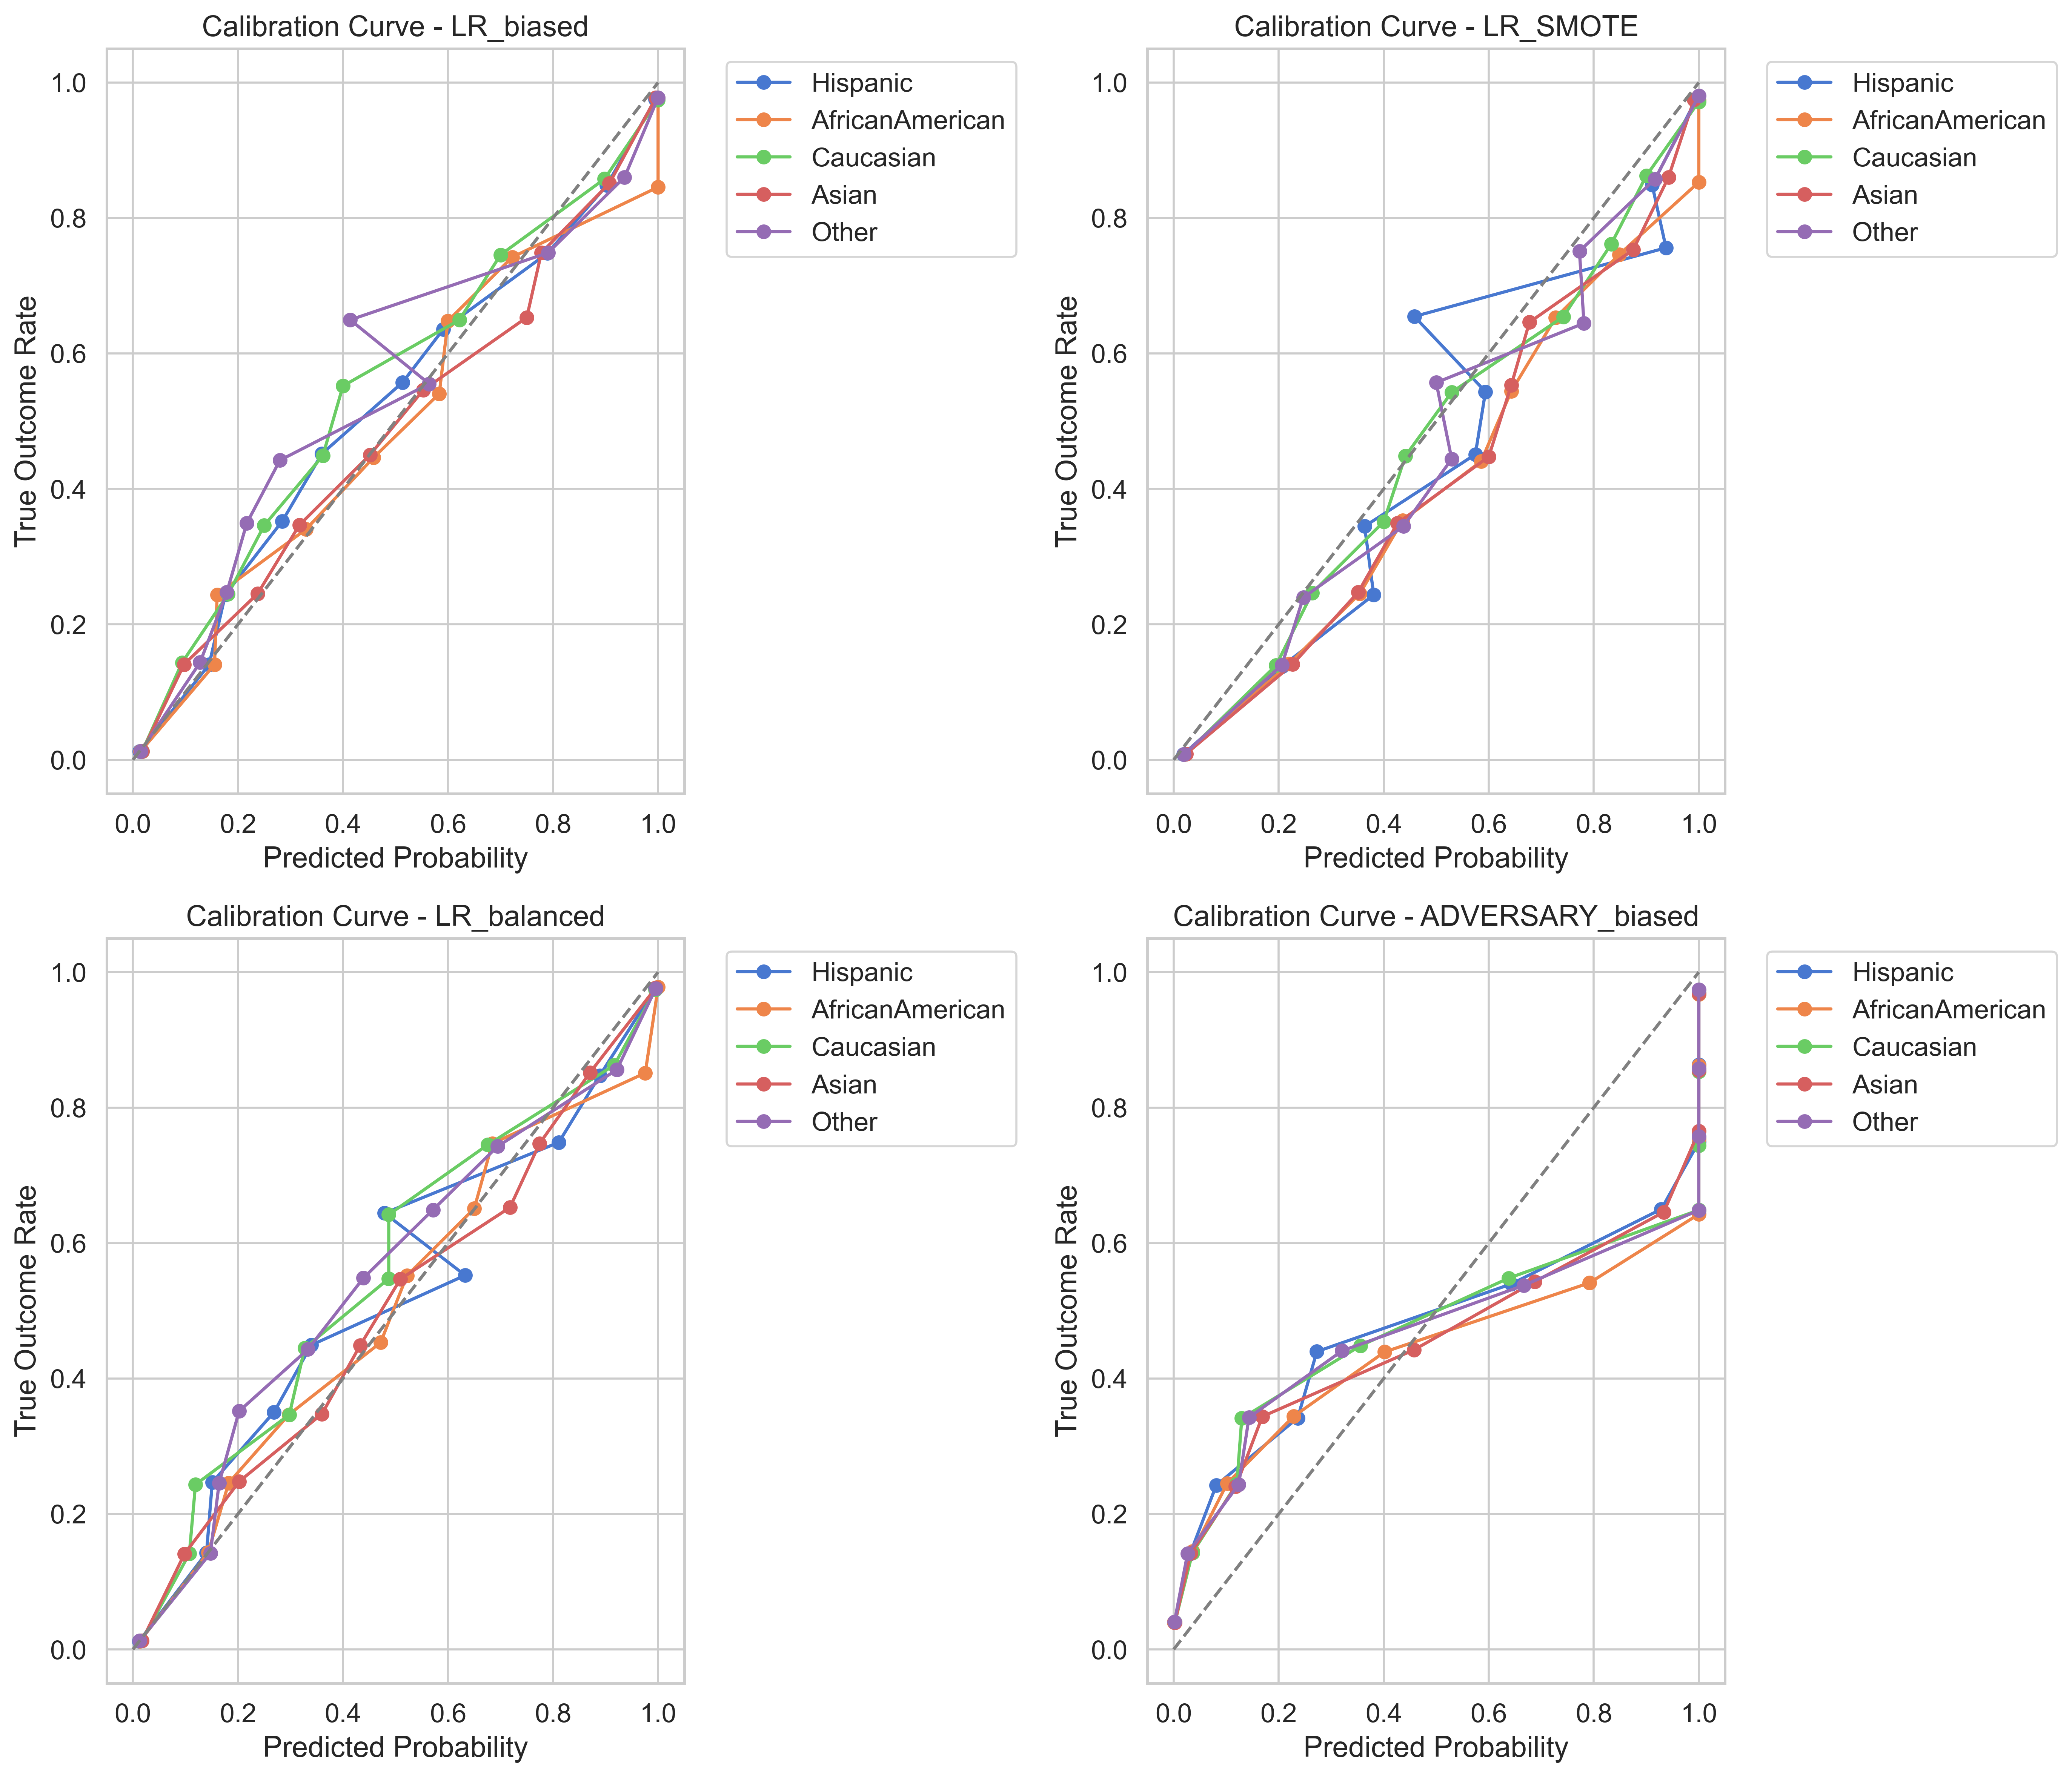

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

models_to_plot = {
    "LR_biased": "inference/LR_biased.csv",
    "LR_SMOTE": "inference/LR_SMOTE.csv",
    "LR_balanced": "inference/LR_balanced.csv",
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
}

fig, axes = plt.subplots(2, 2, figsize=(14, 12),dpi=400)
axes = axes.flatten()

for ax, (model_name, path) in zip(axes, models_to_plot.items()):
    df = pd.read_csv(path)

    for race in df['race'].unique():
        sub = df[df['race'] == race]
        y_true = sub['True_Label']
        y_prob = sub['Probability']

        mp, tr = calibration_curve(y_true, y_prob, n_bins=10)
        ax.plot(mp, tr, marker='o', label=race)

    ax.plot([0,1], [0,1], "--", color="gray")
    ax.set_title(f"Calibration Curve - {model_name}")
    ax.set_xlabel("Predicted Probability")
    ax.set_ylabel("True Outcome Rate")

    # Legend outside
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


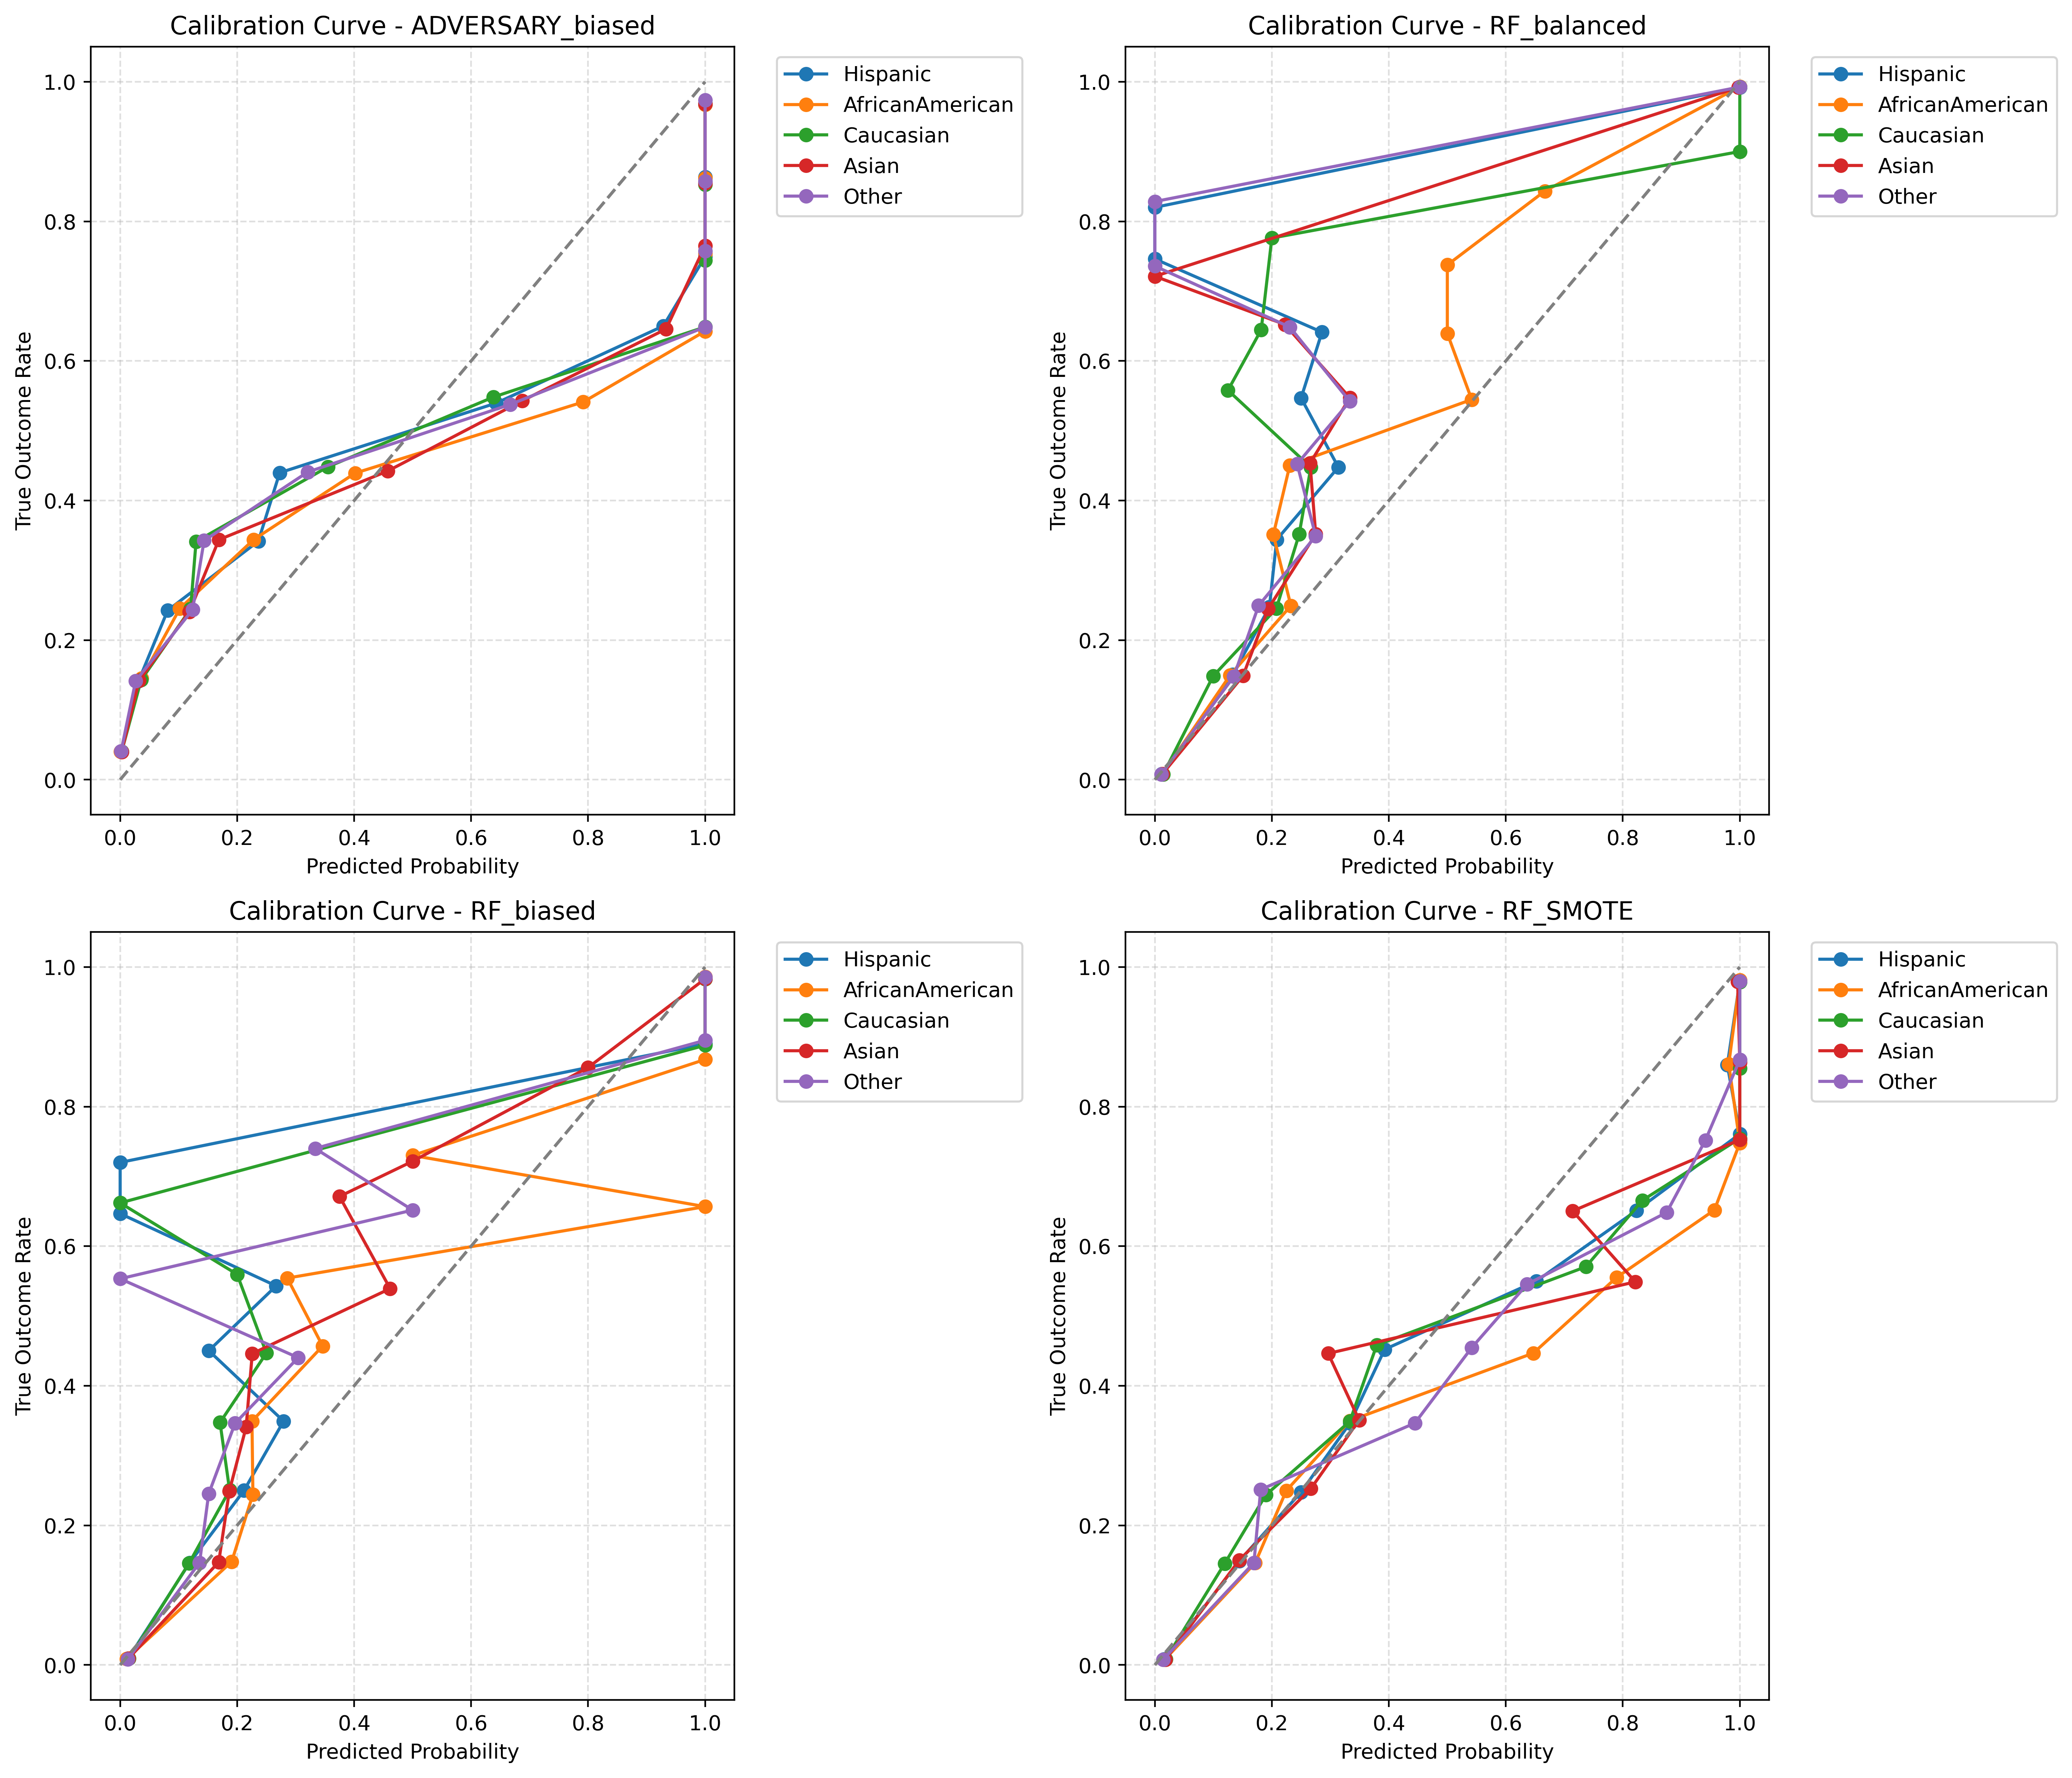

In [20]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# File mapping for clarity
models_to_plot = {
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
    # "LR_balanced": "inference/LR_balanced.csv",
    # "LR_biased": "inference/LR_biased.csv",
    # "LR_SMOTE": "inference/LR_SMOTE.csv",
    "RF_balanced": "inference/RF_balanced.csv",
    "RF_biased": "inference/RF_biased.csv",
    "RF_SMOTE": "inference/RF_SMOTE.csv",
}

fig, axes = plt.subplots(2, 2, figsize=(14, 12),dpi=400)
axes = axes.flatten()

for ax, (model_name, path) in zip(axes, models_to_plot.items()):
    df = pd.read_csv(path)

    for race in df['race'].unique():
        sub = df[df['race'] == race]
        y_true = sub['True_Label']
        y_prob = sub['Probability']

        mp, tr = calibration_curve(y_true, y_prob, n_bins=10)
        ax.plot(mp, tr, marker='o', label=race)

    ax.plot([0,1], [0,1], "--", color="gray")
    ax.set_title(f"Calibration Curve - {model_name}")
    ax.set_xlabel("Predicted Probability")
    ax.grid(True, linestyle='--', alpha=0.4)

    ax.set_ylabel("True Outcome Rate")

    # Legend outside
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


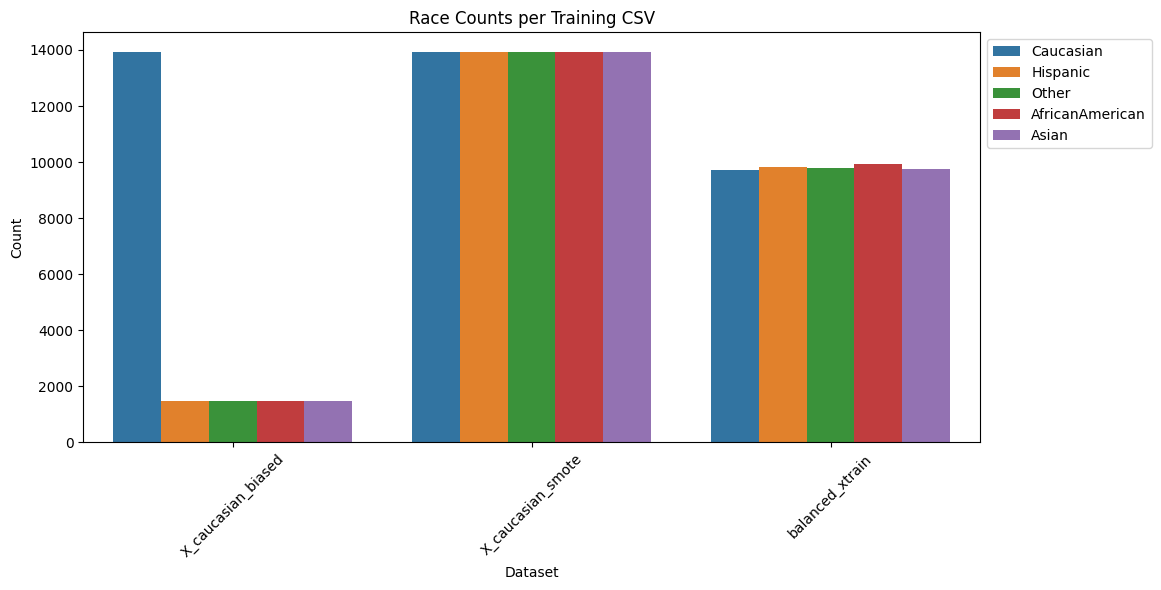

Race  Count             Dataset
0         Caucasian  13933  X_caucasian_biased
1          Hispanic   1492  X_caucasian_biased
2             Other   1492  X_caucasian_biased
3   AfricanAmerican   1492  X_caucasian_biased
4             Asian   1492  X_caucasian_biased
5         Caucasian  13933   X_caucasian_smote
6          Hispanic  13933   X_caucasian_smote
7             Other  13933   X_caucasian_smote
8   AfricanAmerican  13933   X_caucasian_smote
9             Asian  13933   X_caucasian_smote
10  AfricanAmerican   9930     balanced_xtrain
11         Hispanic   9811     balanced_xtrain
12            Other   9773     balanced_xtrain
13            Asian   9757     balanced_xtrain
14        Caucasian   9719     balanced_xtrain

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Training datasets
train_files = {
    "X_caucasian_biased": "data/X_caucasian_biased.csv",
    "X_caucasian_smote": "data/X_caucasian_smote.csv",
    "balanced_xtrain": "data/balanced_xtrain.csv",
}

# Collect race counts per dataset
all_counts = []

for name, path in train_files.items():
    df = pd.read_csv(path)
    
    counts = df["race"].value_counts().reset_index()
    counts.columns = ["Race", "Count"]
    counts["Dataset"] = name
    
    all_counts.append(counts)

race_counts_df = pd.concat(all_counts, ignore_index=True)

# Plot: x = dataset, hue = race
plt.figure(figsize=(10,6))
sns.barplot(
    data=race_counts_df,
    x="Dataset",
    y="Count",
    hue="Race"
)
plt.title("Race Counts per Training CSV")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

race_counts_df


# Final CSVs

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
files = {
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
    "LR_balanced": "inference/LR_balanced.csv",
    "LR_biased": "inference/LR_biased.csv",
    "LR_SMOTE": "inference/LR_SMOTE.csv",
    "RF_balanced": "inference/RF_balanced.csv",
    "RF_biased": "inference/RF_biased.csv",
    "RF_SMOTE": "inference/RF_SMOTE.csv",
}

def fnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn / (fn + tp) if (fn + tp) > 0 else np.nan

overall_metrics = []
race_metrics = []

target_races = ["Caucasian", "AfricanAmerican", "Asian","Hispanic","Other"]

for model_name, path in files.items():
    df = pd.read_csv(path)
    
    y_true = df["True_Label"]
    y_pred = df["Predicted_Label"]
    
    # ---- Overall metrics ----
    overall_metrics.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
    })
    
    # ---- Per-race metrics ----
    for race in df["race"].unique():
        sub = df[df["race"] == race]
        race_metrics.append({
            "Model": model_name,
            "Race": race,
            "Accuracy": accuracy_score(sub["True_Label"], sub["Predicted_Label"]),
            "FNR": fnr(sub["True_Label"], sub["Predicted_Label"]),
        })


In [7]:
overall_df = pd.DataFrame(overall_metrics)
race_df = pd.DataFrame(race_metrics)
fnr_parity_df = (
    race_df
    .groupby("Model")["FNR"]
    .std()
    .reset_index()
    .rename(columns={"FNR": "FNR_Parity_STD"})
)
accuracy_by_race_df = (
    race_df[race_df["Race"].isin(target_races)]
    .pivot(index="Model", columns="Race", values="Accuracy")
    .reset_index()
)


In [8]:
overall_df

Model  Accuracy  Precision    Recall
0  ADVERSARY_biased  0.966861   0.958164  0.641385
1       LR_balanced  0.960260   0.860052  0.640607
2         LR_biased  0.960893   0.874598  0.634772
3          LR_SMOTE  0.958326   0.905463  0.573707
4       RF_balanced  0.969695   0.932362  0.697005
5         RF_biased  0.970895   0.964442  0.685725
6          RF_SMOTE  0.968528   0.969960  0.653053

In [9]:
fnr_parity_df


Model  FNR_Parity_STD
0  ADVERSARY_biased        0.017414
1          LR_SMOTE        0.015894
2       LR_balanced        0.016897
3         LR_biased        0.018036
4          RF_SMOTE        0.019660
5       RF_balanced        0.017911
6         RF_biased        0.019414

In [10]:
accuracy_by_race_df


Race             Model  AfricanAmerican     Asian  Caucasian  Hispanic  \
0     ADVERSARY_biased         0.965047  0.964375   0.966627  0.968066   
1             LR_SMOTE         0.957557  0.955552   0.958874  0.958201   
2          LR_balanced         0.959221  0.956884   0.959717  0.962046   
3            LR_biased         0.959887  0.958049   0.960054  0.961712   
4             RF_SMOTE         0.966545  0.967205   0.969493  0.968902   
5          RF_balanced         0.970872  0.968204   0.968818  0.968734   
6            RF_biased         0.970539  0.970035   0.970673  0.970573   

Race     Other  
0     0.970162  
1     0.961424  
2     0.963403  
3     0.964721  
4     0.970491  
5     0.971810  
6     0.972634

In [14]:
import pandas as pd
import os

# Dictionary provided by the user
files = {
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
    "LR_balanced": "inference/LR_balanced.csv",
    "LR_biased": "inference/LR_biased.csv",
    "LR_SMOTE": "inference/LR_SMOTE.csv",
    "RF_balanced": "inference/RF_balanced.csv",
    "RF_biased": "inference/RF_biased.csv",
    "RF_SMOTE": "inference/RF_SMOTE.csv",
}

results = []

for model_name, file_path in files.items():
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        fnr_by_race = {}
        # Grouping by race to calculate FNR for each group
        for race, group in df.groupby('race'):
            # True Positives: True_Label=1, Predicted_Label=1
            tp = ((group['True_Label'] == 1) & (group['Predicted_Label'] == 1)).sum()
            # False Negatives: True_Label=1, Predicted_Label=0
            fn = ((group['True_Label'] == 1) & (group['Predicted_Label'] == 0)).sum()
            
            total_positives = tp + fn
            fnr = fn / total_positives if total_positives > 0 else 0
            fnr_by_race[race] = fnr
        
        if fnr_by_race:
            # Identifying the races with the highest and lowest FNR
            max_race = max(fnr_by_race, key=fnr_by_race.get)
            min_race = min(fnr_by_race, key=fnr_by_race.get)
            
            max_fnr = fnr_by_race[max_race]
            min_fnr = fnr_by_race[min_race]
            max_diff = max_fnr - min_fnr
            
            results.append({
                "Model Configuration": model_name,
                "Max FNR Difference": round(max_diff, 4),
                "Races Involved (Max vs Min)": f"{max_race} vs {min_race}"
            })
    else:
        print(f"File not found: {file_path}")

# Create the final table
fnr_table = pd.DataFrame(results)

# Displaying the table
print(fnr_table.to_string(index=False))

# Optional: save to CSV
# fnr_table.to_csv('fnr_fairness_comparison.csv', index=False)

Model Configuration  Max FNR Difference Races Involved (Max vs Min)
   ADVERSARY_biased              0.0388    AfricanAmerican vs Other
        LR_balanced              0.0423          Caucasian vs Other
          LR_biased              0.0485          Caucasian vs Other
           LR_SMOTE              0.0386           Hispanic vs Other
        RF_balanced              0.0424          Caucasian vs Other
          RF_biased              0.0428          Caucasian vs Asian
           RF_SMOTE              0.0476    AfricanAmerican vs Asian


In [15]:
import pandas as pd
import os

files = {
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
    "LR_balanced": "inference/LR_balanced.csv",
    "LR_biased": "inference/LR_biased.csv",
    "LR_SMOTE": "inference/LR_SMOTE.csv",
    "RF_balanced": "inference/RF_balanced.csv",
    "RF_biased": "inference/RF_biased.csv",
    "RF_SMOTE": "inference/RF_SMOTE.csv",
}

fpr_results = []

for model_name, file_path in files.items():
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        fpr_by_race = {}
        for race, group in df.groupby('race'):
            # False Positives: True=0, Pred=1
            fp = ((group['True_Label'] == 0) & (group['Predicted_Label'] == 1)).sum()
            # True Negatives: True=0, Pred=0
            tn = ((group['True_Label'] == 0) & (group['Predicted_Label'] == 0)).sum()
            
            total_negatives = fp + tn
            fpr = fp / total_negatives if total_negatives > 0 else 0
            fpr_by_race[race] = fpr
        
        if fpr_by_race:
            max_race = max(fpr_by_race, key=fpr_by_race.get)
            min_race = min(fpr_by_race, key=fpr_by_race.get)
            
            max_fpr = fpr_by_race[max_race]
            min_fpr = fpr_by_race[min_race]
            max_diff = max_fpr - min_fpr
            
            fpr_results.append({
                "Model Configuration": model_name,
                "Max FPR Difference": round(max_diff, 4),
                "Races Involved (Max vs Min)": f"{max_race} vs {min_race}"
            })
    else:
        print(f"File not found: {file_path}")

# Create and display the table
fpr_table = pd.DataFrame(fpr_results)
print(fpr_table.to_string(index=False))

# Save the result
fpr_table.to_csv('fpr_fairness_summary.csv', index=False)

Model Configuration  Max FPR Difference  Races Involved (Max vs Min)
   ADVERSARY_biased              0.0013     Asian vs AfricanAmerican
        LR_balanced              0.0015 Caucasian vs AfricanAmerican
          LR_biased              0.0016           Caucasian vs Asian
           LR_SMOTE              0.0007  Hispanic vs AfricanAmerican
        RF_balanced              0.0024  Hispanic vs AfricanAmerican
          RF_biased              0.0020     Other vs AfricanAmerican
           RF_SMOTE              0.0015     Asian vs AfricanAmerican


In [16]:
import pandas as pd
import os

# Dictionary of models and file paths
files = {
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
    "LR_balanced": "inference/LR_balanced.csv",
    "LR_biased": "inference/LR_biased.csv",
    "LR_SMOTE": "inference/LR_SMOTE.csv",
    "RF_balanced": "inference/RF_balanced.csv",
    "RF_biased": "inference/RF_biased.csv",
    "RF_SMOTE": "inference/RF_SMOTE.csv",
}

overall_results = []

for model_name, file_path in files.items():
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # Filter for only the Negative actual class (True_Label == 0)
        negatives = df[df['True_Label'] == 0]
        
        fp = (negatives['Predicted_Label'] == 1).sum()
        tn = (negatives['Predicted_Label'] == 0).sum()
        
        # Calculate Overall FPR
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        
        overall_results.append({
            "Model Configuration": model_name,
            "Total FP": int(fp),
            "Total TN": int(tn),
            "Overall FPR": round(fpr, 4)
        })
    else:
        print(f"Warning: File {file_path} not found.")

# Create the summary table
fpr_summary = pd.DataFrame(overall_results)

# Display the table
print(fpr_summary.to_string(index=False))

# Optional: Save results
# fpr_summary.to_csv('overall_fpr_summary.csv', index=False)

Model Configuration  Total FP  Total TN  Overall FPR
   ADVERSARY_biased        72     27352       0.0026
        LR_balanced       268     27156       0.0098
          LR_biased       234     27190       0.0085
           LR_SMOTE       154     27270       0.0056
        RF_balanced       130     27294       0.0047
          RF_biased        65     27359       0.0024
           RF_SMOTE        52     27372       0.0019


In [18]:
import pandas as pd
import os

# Dictionary of models and file paths
files = {
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
    "LR_balanced": "inference/LR_balanced.csv",
    "LR_biased": "inference/LR_biased.csv",
    "LR_SMOTE": "inference/LR_SMOTE.csv",
    "RF_balanced": "inference/RF_balanced.csv",
    "RF_biased": "inference/RF_biased.csv",
    "RF_SMOTE": "inference/RF_SMOTE.csv",
}

overall_results = []

for model_name, file_path in files.items():
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # Filter for only the Positive actual class (True_Label == 1)
        positives = df[df['True_Label'] == 1]
        
        fn = (positives['Predicted_Label'] == 0).sum()
        tp = (positives['Predicted_Label'] == 1).sum()
        
        # Calculate Overall FNR
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        
        overall_results.append({
            "Model Configuration": model_name,
            "Total FN": int(fn),
            "Total TP": int(tp),
            "Overall FNR": round(fnr, 4)
        })
    else:
        print(f"Warning: File {file_path} not found.")

# Create the summary table
fnr_summary = pd.DataFrame(overall_results)

# Display the table
print(fnr_summary.to_string(index=False))

# Optional: Save results
# fnr_summary.to_csv('overall_fnr_summary.csv', index=False)


Model Configuration  Total FN  Total TP  Overall FNR
   ADVERSARY_biased       922      1649       0.3586
        LR_balanced       924      1647       0.3594
          LR_biased       939      1632       0.3652
           LR_SMOTE      1096      1475       0.4263
        RF_balanced       779      1792       0.3030
          RF_biased       808      1763       0.3143
           RF_SMOTE       892      1679       0.3469
